
**Library Imports:**


*   imports essential libraries such as numpy, pandas, matplotlib, and machine learning libraries like XGBoost, sklearn, and tensorflow/keras.
*   These libraries are used for data manipulation (pandas), numerical operations (numpy), visualization (matplotlib), and building machine learning models (e.g., XGBoost, RandomForestRegressor, LinearRegression, LSTM from tensorflow/keras).



```



In [45]:
import os

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRFRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint



**Loading the Dataset:**

The dataset salesData.xlsx is loaded into a pandas DataFrame called store_sales using the pd.read_csv() function.


In [47]:
store_sales = pd.read_excel('SalesData.xlsx')
store_sales.head(10)

,store,sales,date,item
0,4000000001,230.95,2020-01-02,CAB X
1,4340003120,0.00,2020-01-02,ADV X
2,4340003120,0.00,2020-01-02,NaN
3,4340001236,26.90,2020-01-02,1011512 02P002 X
4,4340001236,26.90,2020-01-02,1019721 00E002 X
5,NL0040000972,-23.50,2020-01-02,XPO X
6,NL0040000972,-12.00,2020-01-02,XOT X
7,4340000891,156.82,2020-01-02,1032791 029005 X
8,4340000891,156.82,2020-01-02,1032791 029005 X
9,4340000891,156.82,2020-01-02,1000005 01500K004 X



# **check for null values in the dataset **
`*



In [48]:
store_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59720 entries, 0 to 59719
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   store   59720 non-null  object        
 1   sales   59720 non-null  float64       
 2   date    59719 non-null  datetime64[ns]
 3   item    57161 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 1.8+ MB



**Dropping store and item id**



In [49]:
store_sales = store_sales.drop(['store','item'], axis=1)

In [50]:
store_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59720 entries, 0 to 59719
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   sales   59720 non-null  float64       
 1   date    59719 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 933.2 KB



**Converting date to a month period**

converting the dates to a monthly period, then aggregating (summing) the sales data by month. Finally, it converts the monthly period back to a timestamp to make it more user-friendly, with each row representing the total sales for that specific month.


In [51]:
store_sales['date'] = store_sales['date'].dt.to_period("M")
monthly_sales = store_sales.groupby('date').sum().reset_index()

In [52]:
monthly_sales['date'] = monthly_sales['date'].dt.to_timestamp()

In [53]:
monthly_sales.head(100)

,date,sales
0,2020-01-01,142065.45
1,2020-02-01,126738.79
2,2020-03-01,69867.52
3,2020-04-01,2112.45
4,2020-05-01,161068.82
5,2020-06-01,250459.97
6,2020-07-01,255296.32
7,2020-08-01,202706.13
8,2020-09-01,131854.08
9,2020-10-01,122600.50


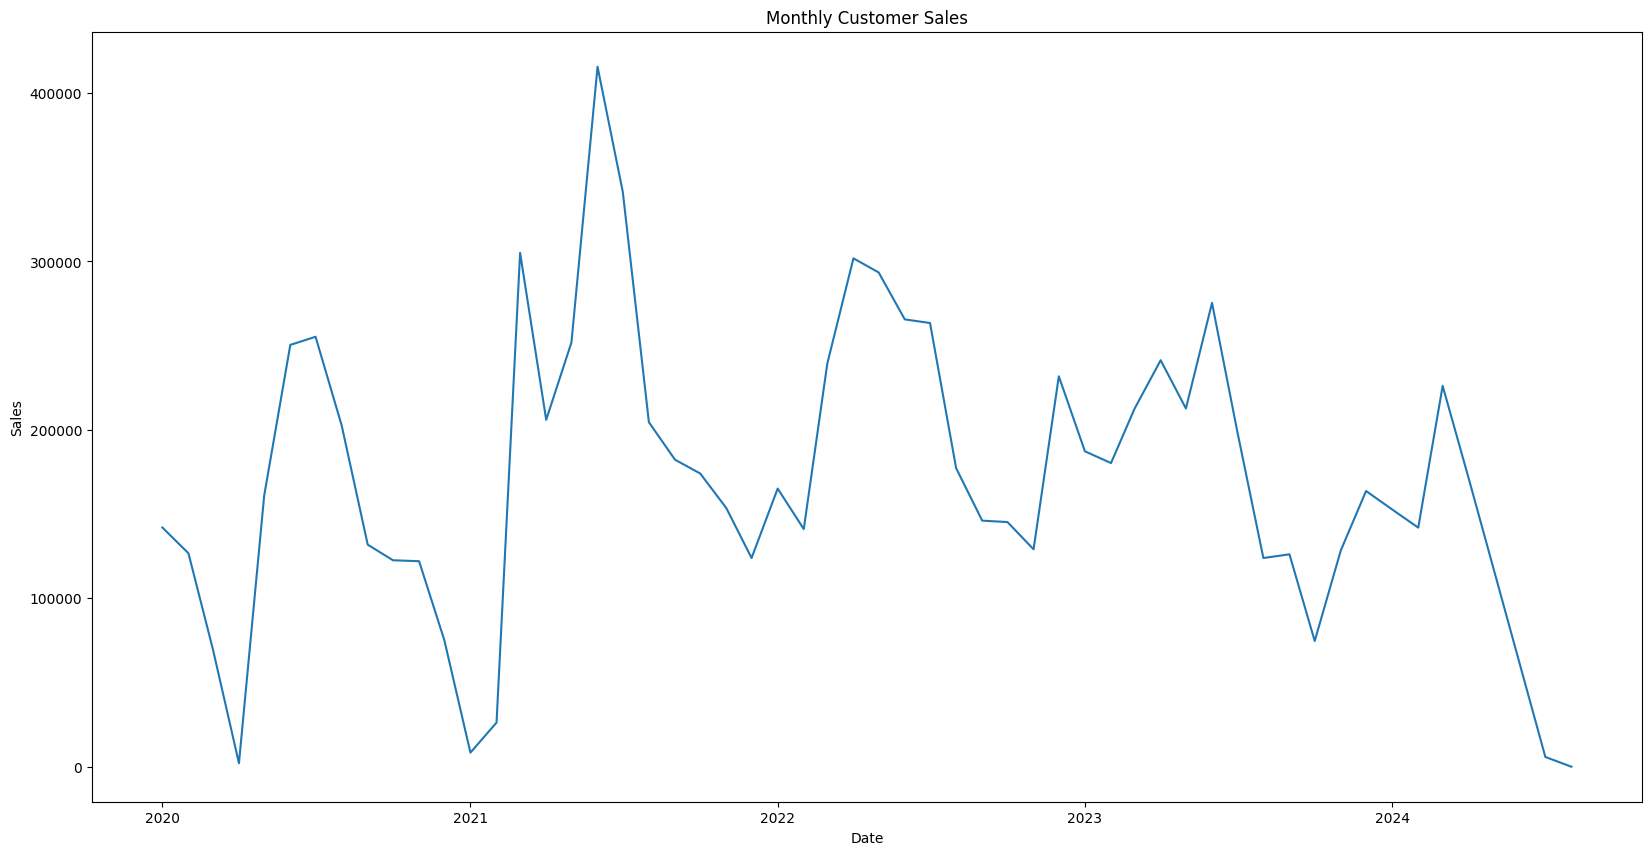

In [54]:
plt.figure(figsize=(20,10))
plt.plot(monthly_sales['date'], monthly_sales['sales'])
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Monthly Customer Sales")
plt.show()

In [55]:
# First differencing
monthly_sales['sales_diff'] = monthly_sales['sales'].diff()




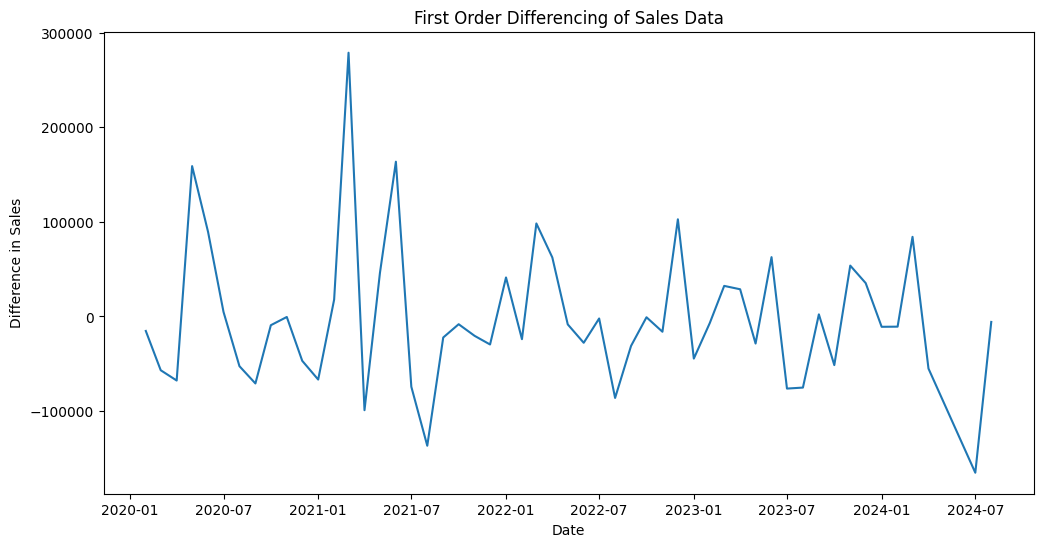

In [56]:
# Plot the first difference
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['date'], monthly_sales['sales_diff'])
plt.title("First Order Differencing of Sales Data")
plt.xlabel("Date")
plt.ylabel("Difference in Sales")
plt.show()

In [57]:
supervised_data = monthly_sales.drop(['date','sales'], axis=1)

In [58]:
for i in range(1,13):
   col_name = 'month_' + str(i)
   supervised_data[col_name] = supervised_data['sales_diff'].shift(i)
supervised_data = supervised_data.dropna().reset_index(drop=True)
supervised_data.head(10)

,sales_diff,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,17822.23,-66724.80,-46909.24,-552.56,-9253.58,-70852.05,-52590.19,4836.35,89391.15,158956.37,-67755.07,-56871.27,-15326.66
1,278868.29,17822.23,-66724.80,-46909.24,-552.56,-9253.58,-70852.05,-52590.19,4836.35,89391.15,158956.37,-67755.07,-56871.27
2,-99125.26,278868.29,17822.23,-66724.80,-46909.24,-552.56,-9253.58,-70852.05,-52590.19,4836.35,89391.15,158956.37,-67755.07
3,45981.16,-99125.26,278868.29,17822.23,-66724.80,-46909.24,-552.56,-9253.58,-70852.05,-52590.19,4836.35,89391.15,158956.37
4,163642.42,45981.16,-99125.26,278868.29,17822.23,-66724.80,-46909.24,-552.56,-9253.58,-70852.05,-52590.19,4836.35,89391.15
5,-74316.78,163642.42,45981.16,-99125.26,278868.29,17822.23,-66724.80,-46909.24,-552.56,-9253.58,-70852.05,-52590.19,4836.35
6,-136715.73,-74316.78,163642.42,45981.16,-99125.26,278868.29,17822.23,-66724.80,-46909.24,-552.56,-9253.58,-70852.05,-52590.19
7,-22252.75,-136715.73,-74316.78,163642.42,45981.16,-99125.26,278868.29,17822.23,-66724.80,-46909.24,-552.56,-9253.58,-70852.05
8,-8214.67,-22252.75,-136715.73,-74316.78,163642.42,45981.16,-99125.26,278868.29,17822.23,-66724.80,-46909.24,-552.56,-9253.58
9,-20518.11,-8214.67,-22252.75,-136715.73,-74316.78,163642.42,45981.16,-99125.26,278868.29,17822.23,-66724.80,-46909.24,-552.56


**split the data into train and test**

> Add blockquote






In [59]:
train_data = supervised_data[:-12]
test_data = supervised_data[-12:]
print("Train Data Shape", train_data.shape)
print("Test Data Shape", test_data.shape)

Train Data Shape (29, 13)
Test Data Shape (12, 13)


In [60]:
scaler = MinMaxScaler(feature_range=(-1,1))
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)


In [61]:
x_train, y_train = train_data[:,1:], train_data[:,0:1]
x_test, y_test = test_data[:,1:], test_data[:,0:1]
y_train = y_train.ravel()
y_test = y_test.ravel()
print("x_train shape : ", x_train.shape)
print("y_train shape : ", y_train.shape)
print("x_test shape : ", x_test.shape)
print("y_test shape : ", y_test.shape)

x_train shape :  (29, 12)
y_train shape :  (29,)
x_test shape :  (12, 12)
y_test shape :  (12,)


**Make predection data frame to merge the predicted sales prices of all trained algs**

In [62]:
sales_dates = monthly_sales['date'][-12:].reset_index(drop=True)
predict_df = pd.DataFrame(sales_dates)

In [63]:
act_sales = monthly_sales['sales'][-13:].tolist()
print(act_sales)

[275411.31, 199147.46, 123931.36, 126145.62, 74683.66, 128451.23, 163708.26, 152764.96, 141975.91, 226157.13, 171068.17, 5828.09, 40.0]


**to create the linear regression model and predicted output**

In [64]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
lr_pre = lr_model.predict(x_test)

In [65]:
lr_pre = lr_pre.reshape(-1,1)
#this is a set matrix - contains the input feature of the test data and also the predicted output
lr_pre_test_set = np.concatenate([lr_pre, x_test], axis=1)
lr_pre_test_set = scaler.inverse_transform(lr_pre_test_set)

In [66]:
result_list=[]
for index in range(0, len(lr_pre_test_set)):
  result_list.append(lr_pre_test_set[index][0] + act_sales[index])
lr_predict_series = pd.Series(result_list, name="Linear Prediction")
predict_df = predict_df.merge(lr_predict_series, left_index = True, right_index=True)

In [67]:
lr_mse = np.sqrt(mean_squared_error(predict_df['Linear Prediction'], monthly_sales['sales'][-12:]))
lr_mae = mean_absolute_error(predict_df['Linear Prediction'], monthly_sales['sales'][-12:])
lr_r2 = r2_score(predict_df['Linear Prediction'], monthly_sales['sales'][-12:])


print(f"Linear Regression MSE: {lr_mse}")
print(f"Linear Regression MAE: {lr_mae}")
print(f"Linear Regression R2 Score: {lr_r2}")

Linear Regression MSE: 78841.3360336271
Linear Regression MAE: 69433.94233458691
Linear Regression R2 Score: -1.5845764819100139


**visualisation of the prediction against the actual sales**

In [68]:
# Assuming predict_df and monthly_sales DataFrames are already defined
lr_mse = np.sqrt(mean_squared_error(predict_df['Linear Prediction'], monthly_sales['sales'][-12:]))
lr_mae = mean_absolute_error(predict_df['Linear Prediction'], monthly_sales['sales'][-12:])
lr_r2 = r2_score = (predict_df['Linear Prediction'], monthly_sales['sales'][-12:])

print("Linear Regression MSE: ", lr_mse)
print("Linear Regression MAE: ", lr_mae)
print("Linear Regression R2 Score: ", lr_r2)

Linear Regression MSE:  78841.3360336271
Linear Regression MAE:  69433.94233458691
Linear Regression R2 Score:  (0     262690.526953
1     198887.359536
2     161599.802252
3     176164.231500
4      86773.708251
5     194715.542330
6     194554.294976
7     223586.090724
8     208380.108520
9     250450.234855
10    156387.833596
11    114010.338062
Name: Linear Prediction, dtype: float64, 42    199147.46
43    123931.36
44    126145.62
45     74683.66
46    128451.23
47    163708.26
48    152764.96
49    141975.91
50    226157.13
51    171068.17
52      5828.09
53        40.00
Name: sales, dtype: float64)


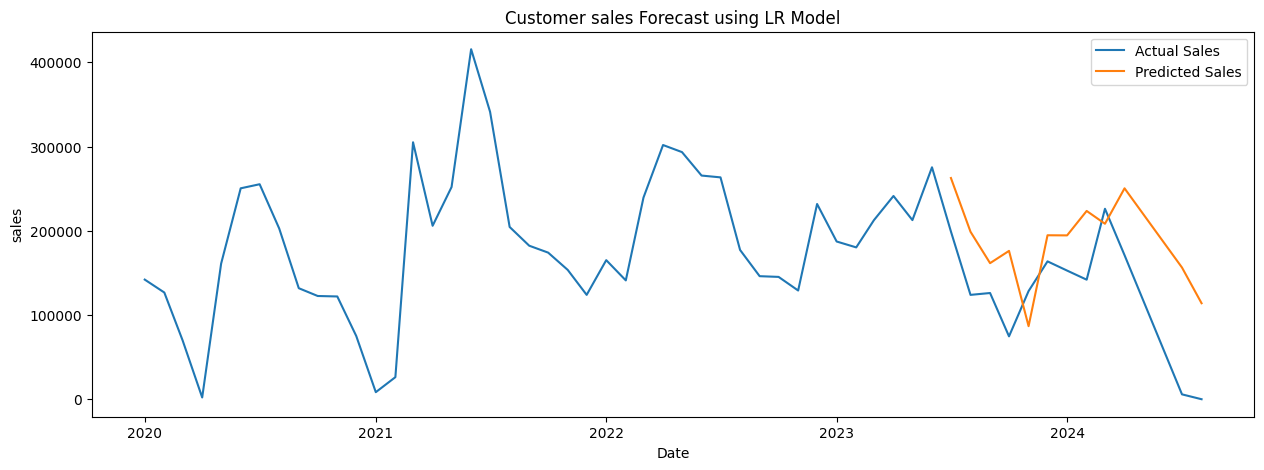

In [69]:
# Plotting actual sales vs predicted sales
plt.figure(figsize=(15, 5))
#actual sales
plt.plot(monthly_sales['date'], monthly_sales['sales'])
#predicted sales
plt.plot(predict_df['date'], predict_df['Linear Prediction'])
plt.title("Customer sales Forecast using LR Model")
plt.xlabel("Date")
plt.ylabel("sales")
plt.legend(['Actual Sales ', 'Predicted Sales'])
plt.show()


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
Random Forest MSE: 0.30436203719459665
Random Forest MAE: 0.2366469026357728
Random Forest R2 Score: 0.033026671971143284


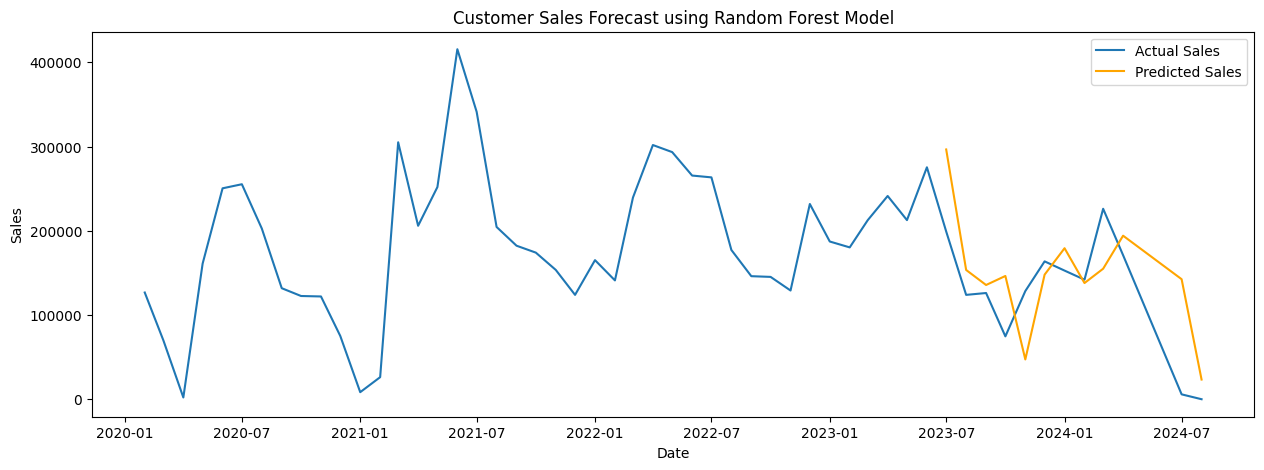

In [70]:
from sklearn.model_selection import GridSearchCV
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Chargement des données
store_sales = pd.read_excel('SalesData.xlsx')

# Suppression des colonnes non pertinentes et conversion des dates
store_sales = store_sales.drop(['store', 'item'], axis=1)
store_sales['date'] = store_sales['date'].dt.to_period("M")

# Agrégation mensuelle des ventes
monthly_sales = store_sales.groupby('date').sum().reset_index()
monthly_sales['date'] = monthly_sales['date'].dt.to_timestamp()

# Première différenciation
monthly_sales['sales_diff'] = monthly_sales['sales'].diff()
monthly_sales = monthly_sales.dropna()

# Création des données supervisées
supervised_data = monthly_sales.drop(['date', 'sales'], axis=1)
for i in range(1, 13):
    col_name = 'month_' + str(i)
    supervised_data[col_name] = supervised_data['sales_diff'].shift(i)

supervised_data = supervised_data.dropna().reset_index(drop=True)

# Division des données en ensembles d'entraînement et de test
train_data = supervised_data[:-12]
test_data = supervised_data[-12:]

# Mise à l'échelle des données
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

x_train, y_train = train_data[:, 1:], train_data[:, 0:1]
x_test, y_test = test_data[:, 1:], test_data[:, 0:1]

y_train = y_train.ravel()
y_test = y_test.ravel()
# Définition des hyperparamètres à tester
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [ 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instanciation du modèle RandomForestRegressor
rf_model = RandomForestRegressor()

# Grid Search avec validation croisée
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

# Meilleurs hyperparamètres
print("Best Parameters:", grid_search.best_params_)

# Evaluation du modèle avec les meilleurs hyperparamètres
best_rf_model = grid_search.best_estimator_
rf_pre = best_rf_model.predict(x_test)

# Calcul des métriques
rf_mse = np.sqrt(mean_squared_error(y_test, rf_pre))
rf_mae = mean_absolute_error(y_test, rf_pre)
rf_r2 = r2_score(y_test, rf_pre)

print(f"Random Forest MSE: {rf_mse}")
print(f"Random Forest MAE: {rf_mae}")
print(f"Random Forest R2 Score: {rf_r2}")
# Visualisation des résultats
# Inversez la transformation pour obtenir les prédictions sur l'échelle d'origine
rf_pre = rf_pre.reshape(-1, 1)
rf_pre_test_set = np.concatenate([rf_pre, x_test], axis=1)
rf_pre_test_set = scaler.inverse_transform(rf_pre_test_set)

# Ajouter les prédictions aux données de test
result_list = []
act_sales = monthly_sales['sales'][-13:].tolist()
for index in range(0, len(rf_pre_test_set)):
    result_list.append(rf_pre_test_set[index][0] + act_sales[index])

# Créer une série de prédictions
rf_predict_series = pd.Series(result_list, name="RandomForest Prediction")
predict_df = pd.DataFrame(monthly_sales['date'][-12:].reset_index(drop=True))
predict_df = predict_df.merge(rf_predict_series, left_index=True, right_index=True)

# Tracer les ventes réelles et prédites
plt.figure(figsize=(15, 5))
plt.plot(monthly_sales['date'], monthly_sales['sales'], label='Actual Sales')
plt.plot(predict_df['date'], predict_df['RandomForest Prediction'], label='Predicted Sales', color='orange')
plt.title("Customer Sales Forecast using Random Forest Model")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()


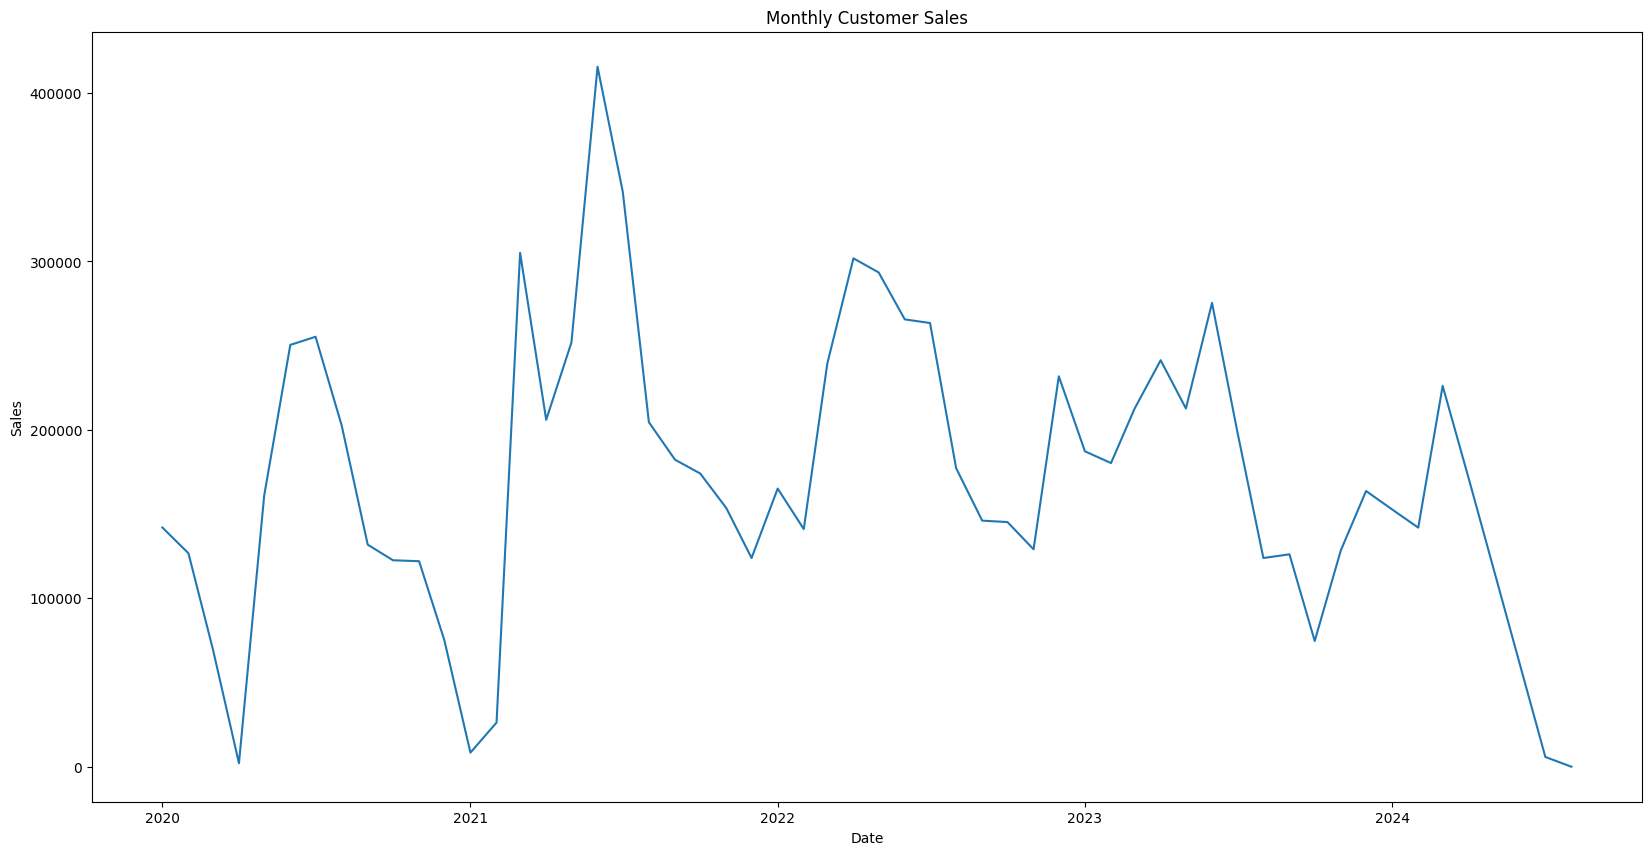

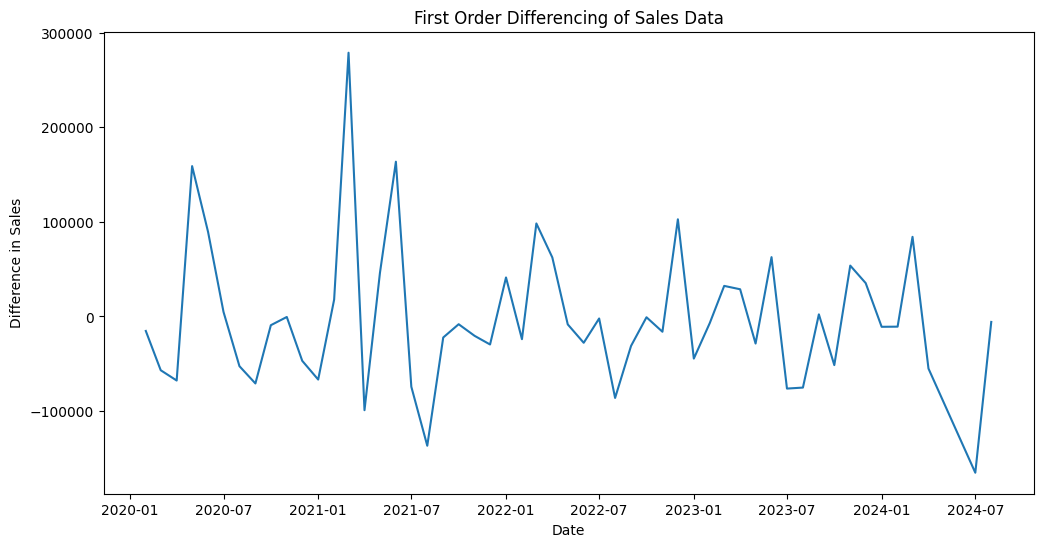

Linear Regression MSE: 78841.3360336271
Linear Regression MAE: 69433.94233458691
Linear Regression R2 Score: -1.5845764819100139
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Random Forest MSE: 64946.067004916215
Random Forest MAE: 50029.199236875305
Random Forest R2 Score: 0.03302587734498452


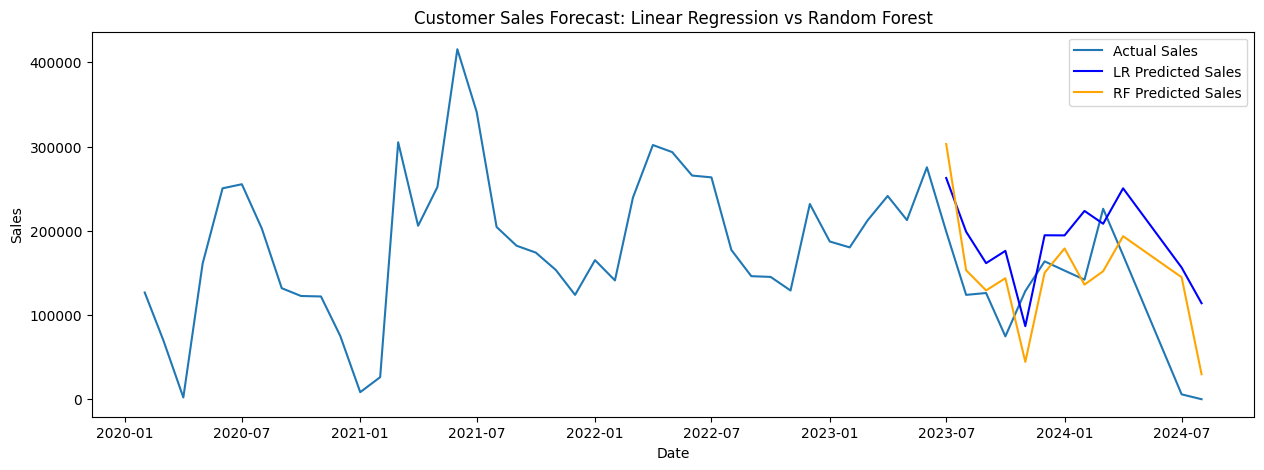

In [71]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRFRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Load the data
store_sales = pd.read_excel('SalesData.xlsx')

# Preprocess the data
store_sales = store_sales.drop(['store', 'item'], axis=1)
store_sales['date'] = store_sales['date'].dt.to_period("M")

# Aggregate monthly sales
monthly_sales = store_sales.groupby('date').sum().reset_index()
monthly_sales['date'] = monthly_sales['date'].dt.to_timestamp()

# Plot the data
plt.figure(figsize=(20,10))
plt.plot(monthly_sales['date'], monthly_sales['sales'])
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Monthly Customer Sales")
plt.show()

# First differencing
monthly_sales['sales_diff'] = monthly_sales['sales'].diff()
monthly_sales = monthly_sales.dropna()

# Plot first differencing
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['date'], monthly_sales['sales_diff'])
plt.title("First Order Differencing of Sales Data")
plt.xlabel("Date")
plt.ylabel("Difference in Sales")
plt.show()

# Create supervised data
supervised_data = monthly_sales.drop(['date', 'sales'], axis=1)
for i in range(1, 13):
    col_name = 'month_' + str(i)
    supervised_data[col_name] = supervised_data['sales_diff'].shift(i)
supervised_data = supervised_data.dropna().reset_index(drop=True)

# Split data into train and test
train_data = supervised_data[:-12]
test_data = supervised_data[-12:]

# Scale the data
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

x_train, y_train = train_data[:, 1:], train_data[:, 0:1]
x_test, y_test = test_data[:, 1:], test_data[:, 0:1]
y_train = y_train.ravel()
y_test = y_test.ravel()

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
lr_pre = lr_model.predict(x_test)

# Calculate metrics for Linear Regression
lr_pre = lr_pre.reshape(-1,1)
lr_pre_test_set = np.concatenate([lr_pre, x_test], axis=1)
lr_pre_test_set = scaler.inverse_transform(lr_pre_test_set)
result_list = []
act_sales = monthly_sales['sales'][-13:].tolist()
for index in range(0, len(lr_pre_test_set)):
    result_list.append(lr_pre_test_set[index][0] + act_sales[index])
lr_predict_series = pd.Series(result_list, name="Linear Prediction")
predict_df = pd.DataFrame(monthly_sales['date'][-12:].reset_index(drop=True))
predict_df = predict_df.merge(lr_predict_series, left_index=True, right_index=True)

# Linear Regression Metrics
lr_mse = np.sqrt(mean_squared_error(predict_df['Linear Prediction'], monthly_sales['sales'][-12:]))
lr_mae = mean_absolute_error(predict_df['Linear Prediction'], monthly_sales['sales'][-12:])
lr_r2 = r2_score(predict_df['Linear Prediction'], monthly_sales['sales'][-12:])
print(f"Linear Regression MSE: {lr_mse}")
print(f"Linear Regression MAE: {lr_mae}")
print(f"Linear Regression R2 Score: {lr_r2}")

# Random Forest Model with Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_model = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

# Best Parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluation of Random Forest
best_rf_model = grid_search.best_estimator_
rf_pre = best_rf_model.predict(x_test)

# Random Forest Metrics
rf_pre = rf_pre.reshape(-1, 1)
rf_pre_test_set = np.concatenate([rf_pre, x_test], axis=1)
rf_pre_test_set = scaler.inverse_transform(rf_pre_test_set)
result_list = []
for index in range(0, len(rf_pre_test_set)):
    result_list.append(rf_pre_test_set[index][0] + act_sales[index])
rf_predict_series = pd.Series(result_list, name="RandomForest Prediction")
predict_df = predict_df.merge(rf_predict_series, left_index=True, right_index=True)

rf_mse = np.sqrt(mean_squared_error(predict_df['RandomForest Prediction'], monthly_sales['sales'][-12:]))
rf_mae = mean_absolute_error(predict_df['RandomForest Prediction'], monthly_sales['sales'][-12:])
rf_r2 = r2_score(predict_df['RandomForest Prediction'], monthly_sales['sales'][-12:])
print(f"Random Forest MSE: {rf_mse}")
print(f"Random Forest MAE: {rf_mae}")
print(f"Random Forest R2 Score: {rf_r2}")

# Visualization
plt.figure(figsize=(15, 5))
plt.plot(monthly_sales['date'], monthly_sales['sales'], label='Actual Sales')
plt.plot(predict_df['date'], predict_df['Linear Prediction'], label='LR Predicted Sales', color='blue')
plt.plot(predict_df['date'], predict_df['RandomForest Prediction'], label='RF Predicted Sales', color='orange')
plt.title("Customer Sales Forecast: Linear Regression vs Random Forest")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()


In [28]:
import pandas as pd

# Filtrer les données pour la période souhaitée (par exemple, du 07-2023 à 07-2024)
start_date = '2023-07-01'
end_date = '2024-07-31'
comparison_df = pd.DataFrame({
    'Date': predict_df['date'],
    'Actual Sales': monthly_sales['sales'][-12:].values,
    'LR Predicted Sales': predict_df['Linear Prediction'],
    'RF Predicted Sales': predict_df['RandomForest Prediction']
})

# Filtrer pour la période souhaitée
comparison_df = comparison_df[(comparison_df['Date'] >= start_date) & (comparison_df['Date'] <= end_date)]

# Fonction pour colorer en vert la valeur prédite la plus proche des ventes réelles
def highlight_closest(row):
    lr_diff = abs(row['Actual Sales'] - row['LR Predicted Sales'])
    rf_diff = abs(row['Actual Sales'] - row['RF Predicted Sales'])
    
    if lr_diff < rf_diff:
        return ['','', 'background-color: lightgreen', '']
    else:
        return ['', '', '', 'background-color: lightgreen']

# Appliquer le style à chaque ligne
styled_df = comparison_df.style.apply(highlight_closest, axis=1)

# Afficher le tableau stylisé
styled_df


,Date,Actual Sales,LR Predicted Sales,RF Predicted Sales
0,2023-07-01 00:00:00,199147.460000,262690.526953,292824.065844
1,2023-08-01 00:00:00,123931.360000,198887.359536,151101.923592
2,2023-09-01 00:00:00,126145.620000,161599.802252,135569.519480
3,2023-10-01 00:00:00,74683.660000,176164.231500,146108.488051
4,2023-11-01 00:00:00,128451.230000,86773.708251,50794.564797
5,2023-12-01 00:00:00,163708.260000,194715.542330,145748.541018
6,2024-01-01 00:00:00,152764.960000,194554.294976,168238.917236
7,2024-02-01 00:00:00,141975.910000,223586.090724,134295.951035
8,2024-03-01 00:00:00,226157.130000,208380.108520,159099.740917
9,2024-04-01 00:00:00,171068.170000,250450.234855,195063.798806


Skipping year 2020 as it has no training data after filtering.


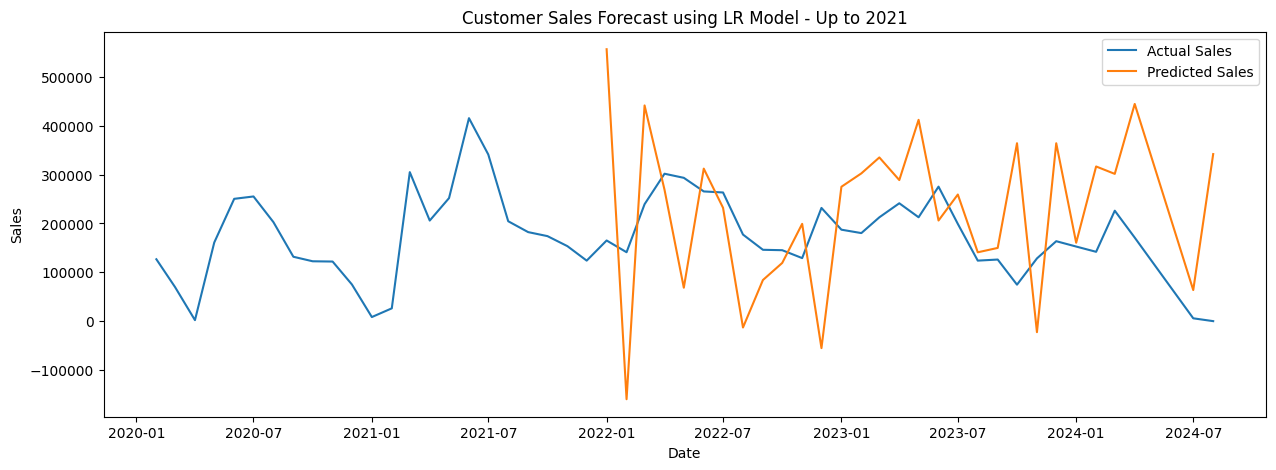

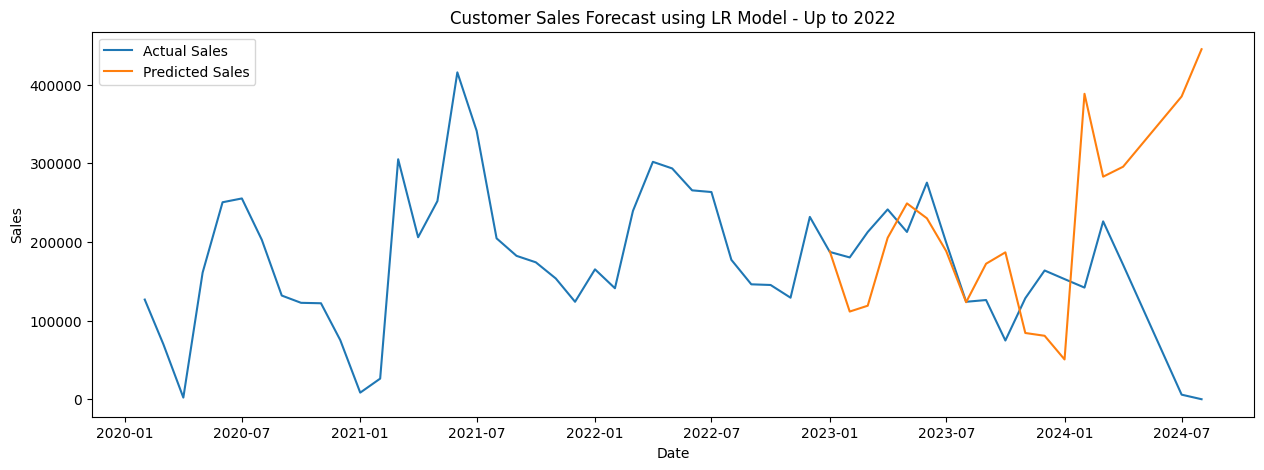

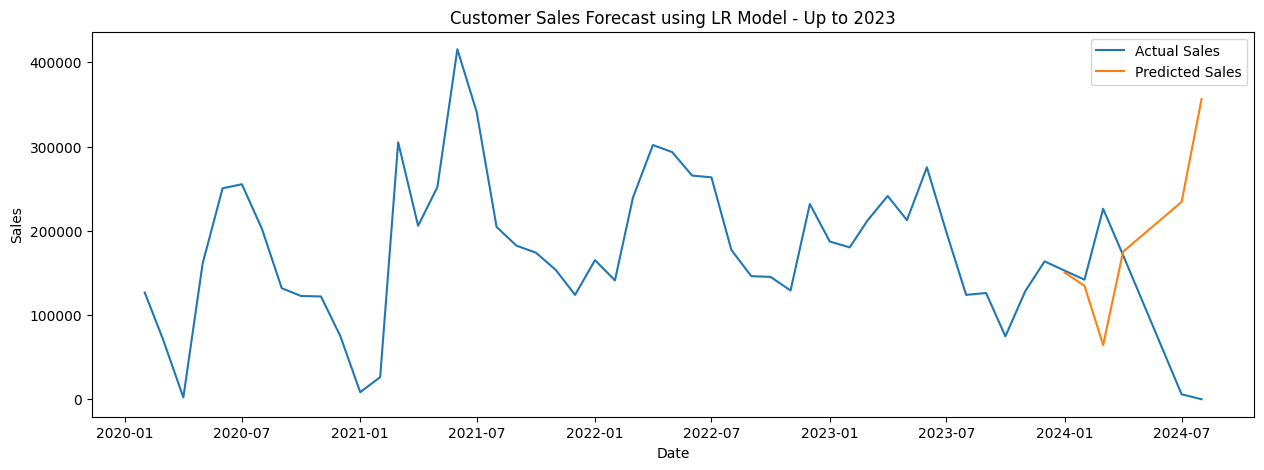

Years: 2020 2021
Linear Regression MSE: 281254.65340038284
Linear Regression MAE: 254141.70450566337
Linear Regression R2 Score: -2.0170214677843394


Years: 2020 2021 2022
Linear Regression MSE: 262638.9937295222
Linear Regression MAE: 223219.09719799113
Linear Regression R2 Score: -4.680110385061875


Years: 2020 2021 2022 2023
Linear Regression MSE: 255455.74860451458
Linear Regression MAE: 219807.70355104448
Linear Regression R2 Score: -6.80381579236377




In [29]:
# Create the supervised data including the 'date' column
supervised_data = monthly_sales[['date', 'sales_diff']]

# Shift the 'sales_diff' to create lag features
for i in range(1, 13):
    col_name = 'month_' + str(i)
    supervised_data[col_name] = supervised_data['sales_diff'].shift(i)

# Drop any rows with NaN values resulting from the shift
supervised_data = supervised_data.dropna().reset_index(drop=True)

# List of years to include progressively
years = ['2020', '2021', '2022', '2023']

# Store the results
results = []

for i in range(1, len(years) + 1):
    # Filter data up to the ith year
    train_data = supervised_data[supervised_data['date'].dt.year <= int(years[i - 1])]
    test_data = supervised_data[supervised_data['date'].dt.year > int(years[i - 1])]
    
    # Check if train_data is empty
    if train_data.empty:
        print(f"Skipping year {years[i - 1]} as it has no training data after filtering.")
        continue
    
    # Reset index
    train_data = train_data.reset_index(drop=True)
    test_data = test_data.reset_index(drop=True)
    
    # Drop the 'date' column before scaling
    train_data_nodate = train_data.drop(['date'], axis=1)
    test_data_nodate = test_data.drop(['date'], axis=1)
    
    # Scale the data
    scaler.fit(train_data_nodate)
    train_data_scaled = scaler.transform(train_data_nodate)
    test_data_scaled = scaler.transform(test_data_nodate)
    
    # Split data into features and target
    x_train, y_train = train_data_scaled[:, 1:], train_data_scaled[:, 0:1]
    x_test, y_test = test_data_scaled[:, 1:], test_data_scaled[:, 0:1]
    
    # Flatten target
    y_train = y_train.ravel()
    y_test = y_test.ravel()
    
    # Train the model
    lr_model.fit(x_train, y_train)
    
    # Make predictions
    lr_pre = lr_model.predict(x_test)
    lr_pre = lr_pre.reshape(-1, 1)
    
    # Inverse transform to get actual values
    lr_pre_test_set = np.concatenate([lr_pre, x_test], axis=1)
    lr_pre_test_set = scaler.inverse_transform(lr_pre_test_set)
    
    # Compute predicted sales
    result_list = []
    act_sales = monthly_sales['sales'][:len(lr_pre_test_set)].tolist()
    for index in range(0, len(lr_pre_test_set)):
        result_list.append(lr_pre_test_set[index][0] + act_sales[index])
    
    lr_predict_series = pd.Series(result_list, name="Linear Prediction")
    predict_df = pd.DataFrame(test_data['date'])
    predict_df = predict_df.merge(lr_predict_series, left_index=True, right_index=True)
    
    # Calculate metrics
    lr_mse = np.sqrt(mean_squared_error(predict_df['Linear Prediction'], test_data['sales_diff']))
    lr_mae = mean_absolute_error(predict_df['Linear Prediction'], test_data['sales_diff'])
    lr_r2 = r2_score(predict_df['Linear Prediction'], test_data['sales_diff'])
    
    # Append the results
    results.append({
        'years': years[:i],
        'mse': lr_mse,
        'mae': lr_mae,
        'r2': lr_r2
    })
    
    # Plot actual vs predicted sales
    plt.figure(figsize=(15, 5))
    plt.plot(monthly_sales['date'], monthly_sales['sales'])
    plt.plot(predict_df['date'], predict_df['Linear Prediction'])
    plt.title(f"Customer Sales Forecast using LR Model - Up to {years[i - 1]}")
    plt.xlabel("Date")
    plt.ylabel("Sales")
    plt.legend(['Actual Sales', 'Predicted Sales'])
    plt.show()

# Print results summary
for result in results:
    print(f"Years: {' '.join(result['years'])}")
    print(f"Linear Regression MSE: {result['mse']}")
    print(f"Linear Regression MAE: {result['mae']}")
    print(f"Linear Regression R2 Score: {result['r2']}")
    print("\n")



- Removing trends in a time series refers to the process of eliminating long-term increases or decreases in the data over time, so that the underlying patterns, such as seasonal variations or sudden changes, can be more easily identified and analyzed.

- First differencing helps you see the changes between consecutive months, removing the overall trend in the data.

- This makes it easier to analyze patterns and prepare the data for further analysis, such as using statistical models to predict future sales.


- Second differencing helps to further stabilize the data by removing any remaining trend-like behavior, making the data more stationary and easier to analyze.
This step is especially important in preparing the data for certain time series models that require a stationary dataset.


- Seasonal decomposition breaks down a time series into trend, seasonality, and residual components.

- It helps you understand the underlying patterns in the data and allows you to remove seasonality if needed.

- This technique is especially useful when you need to focus on the trend or improve the accuracy of your forecasting models by accounting for seasonal effects.

Données d'entraînement insuffisantes pour l'année 2020.


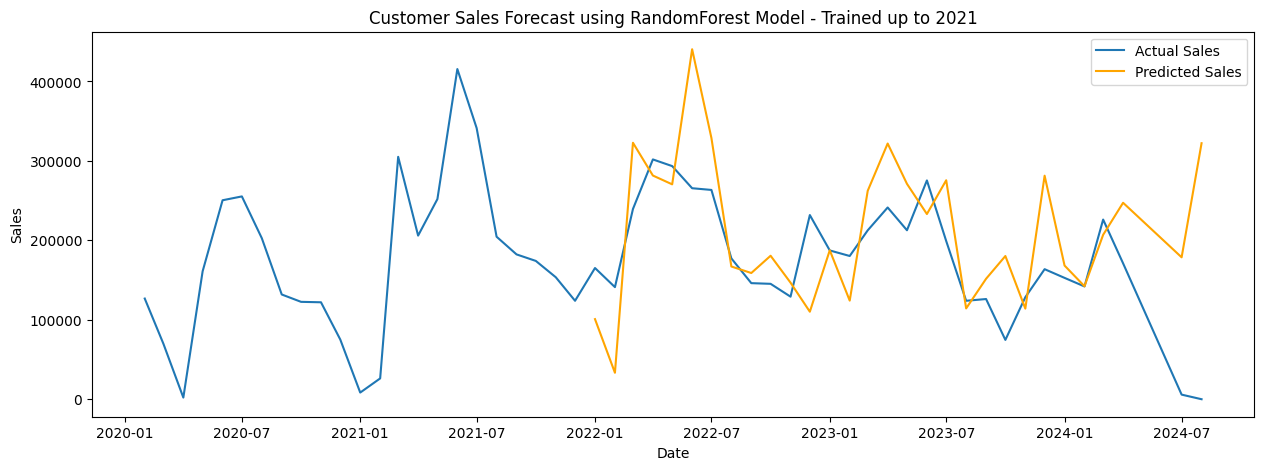

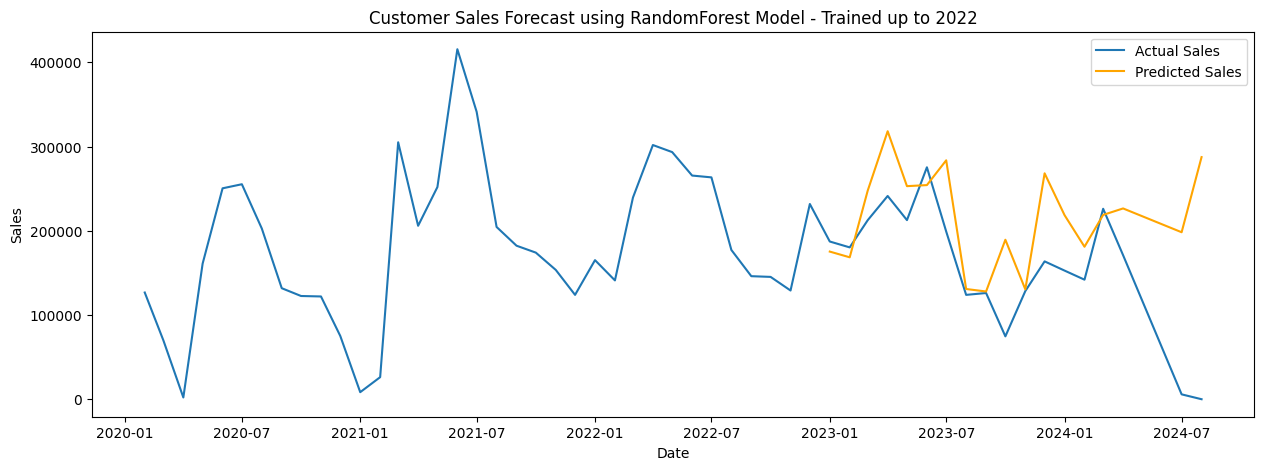

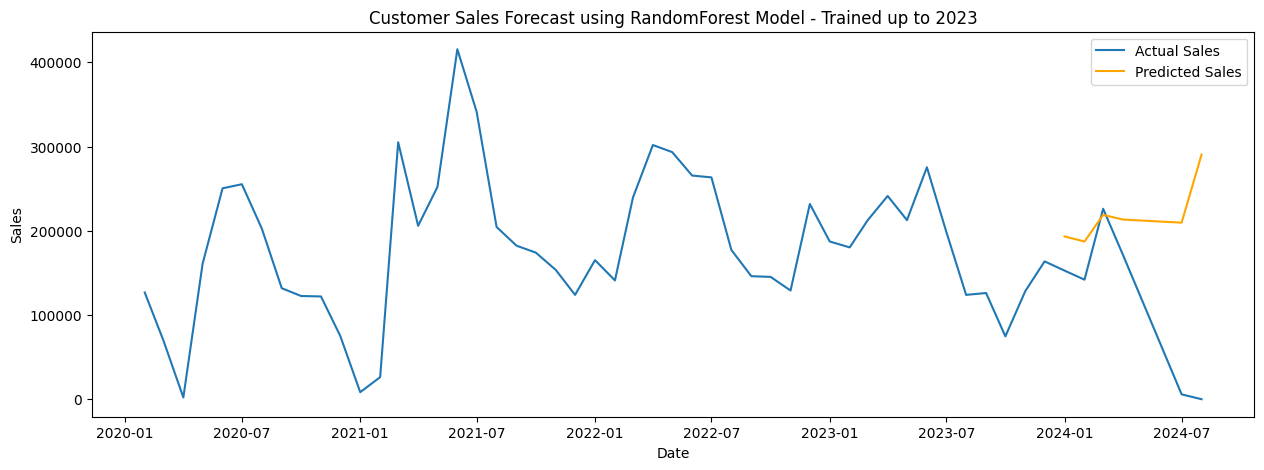

Training Years: 2020 2021
RandomForest MSE: 237242.09231355716
RandomForest MAE: 214967.7874766667
RandomForest R2 Score: -6.280030849250017


Training Years: 2020 2021 2022
RandomForest MSE: 239981.88560704555
RandomForest MAE: 228367.79900555557
RandomForest R2 Score: -17.747813793363907


Training Years: 2020 2021 2022 2023
RandomForest MSE: 258038.4038538125
RandomForest MAE: 246111.1830166667
RandomForest R2 Score: -56.91600288148957




In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is already loaded and preprocessed as monthly_sales
# And 'monthly_sales' DataFrame contains 'date', 'sales', and 'sales_diff' columns

# Create the supervised data including the 'date' column
supervised_data = monthly_sales[['date', 'sales_diff']]

# Shift the 'sales_diff' to create lag features
for i in range(1, 13):
    col_name = 'month_' + str(i)
    supervised_data[col_name] = supervised_data['sales_diff'].shift(i)

# Drop any rows with NaN values resulting from the shift
supervised_data = supervised_data.dropna().reset_index(drop=True)

# List of years for progressive training and testing
years = ['2020', '2021', '2022', '2023' , '2024']

# Initialize scaler
scaler = MinMaxScaler(feature_range=(-1, 1))

# Initialize model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Store the results
results = []

for i in range(1, len(years)):
    # Train on data up to the ith year and predict for the remaining years
    train_data = supervised_data[supervised_data['date'].dt.year <= int(years[i - 1])]
    test_data = supervised_data[supervised_data['date'].dt.year > int(years[i - 1])]
    
    # Vérifier si les données d'entraînement ne sont pas vides
    if train_data.empty:
        print(f"Données d'entraînement insuffisantes pour l'année {years[i-1]}.")
        continue
    
    # Reset index
    train_data = train_data.reset_index(drop=True)
    test_data = test_data.reset_index(drop=True)
    
    # Drop the 'date' column before scaling
    train_data_nodate = train_data.drop(['date'], axis=1)
    test_data_nodate = test_data.drop(['date'], axis=1)
    
    # Scale the data
    scaler.fit(train_data_nodate)
    train_data_scaled = scaler.transform(train_data_nodate)
    test_data_scaled = scaler.transform(test_data_nodate)
    
    # Split data into features and target
    x_train, y_train = train_data_scaled[:, 1:], train_data_scaled[:, 0]
    x_test, y_test = test_data_scaled[:, 1:], test_data_scaled[:, 0]
    
    # Train the model
    rf_model.fit(x_train, y_train)
    
    # Make predictions
    rf_pre = rf_model.predict(x_test)
    rf_pre = rf_pre.reshape(-1, 1)
    
    # Inverse transform to get actual values
    rf_pre_test_set = np.concatenate([rf_pre, x_test], axis=1)
    rf_pre_test_set = scaler.inverse_transform(rf_pre_test_set)
    
    # Compute predicted sales
    result_list = []
    act_sales = monthly_sales['sales'][len(train_data):len(train_data) + len(rf_pre_test_set)].tolist()
    for index in range(0, len(rf_pre_test_set)):
        result_list.append(rf_pre_test_set[index][0] + act_sales[index])
    
    rf_predict_series = pd.Series(result_list, name="RandomForest Prediction")
    predict_df = pd.DataFrame(test_data['date'])
    predict_df = predict_df.merge(rf_predict_series, left_index=True, right_index=True)
    
    # Calculate metrics
    rf_mse = np.sqrt(mean_squared_error(predict_df['RandomForest Prediction'], test_data['sales_diff']))
    rf_mae = mean_absolute_error(predict_df['RandomForest Prediction'], test_data['sales_diff'])
    rf_r2 = r2_score(predict_df['RandomForest Prediction'], test_data['sales_diff'])
    
    # Append the results
    results.append({
        'training_years': years[:i],
        'mse': rf_mse,
        'mae': rf_mae,
        'r2': rf_r2
    })
    
    # Plot actual vs predicted sales
    plt.figure(figsize=(15, 5))
    plt.plot(monthly_sales['date'], monthly_sales['sales'], label='Actual Sales')
    plt.plot(predict_df['date'], predict_df['RandomForest Prediction'], label='Predicted Sales', color='orange')
    plt.title(f"Customer Sales Forecast using RandomForest Model - Trained up to {years[i-1]}")
    plt.xlabel("Date")
    plt.ylabel("Sales")
    plt.legend()
    plt.show()

# Print results summary
for result in results:
    print(f"Training Years: {' '.join(result['training_years'])}")
    print(f"RandomForest MSE: {result['mse']}")
    print(f"RandomForest MAE: {result['mae']}")
    print(f"RandomForest R2 Score: {result['r2']}")
    print("\n")


Données d'entraînement insuffisantes pour l'année 2020.


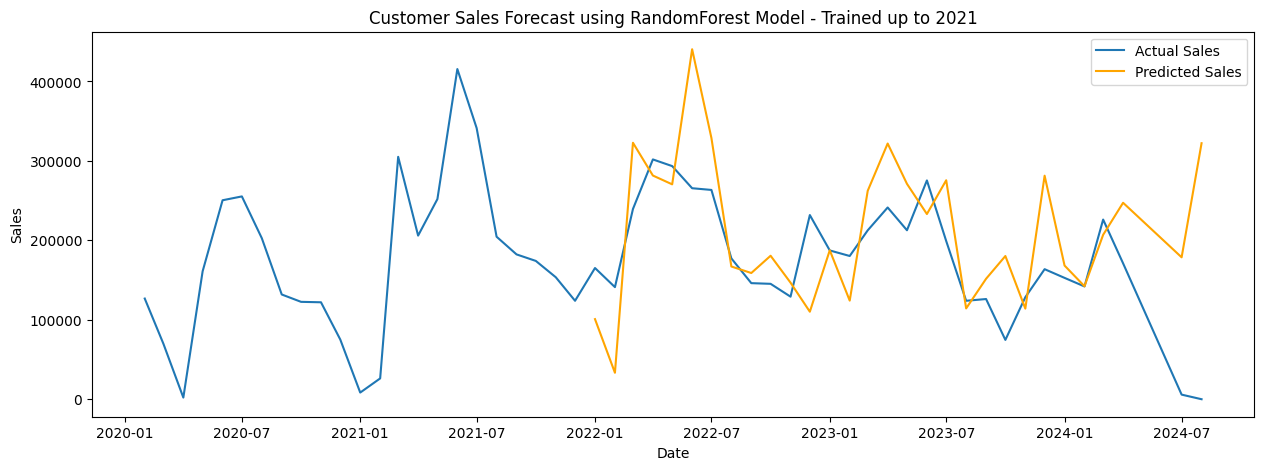

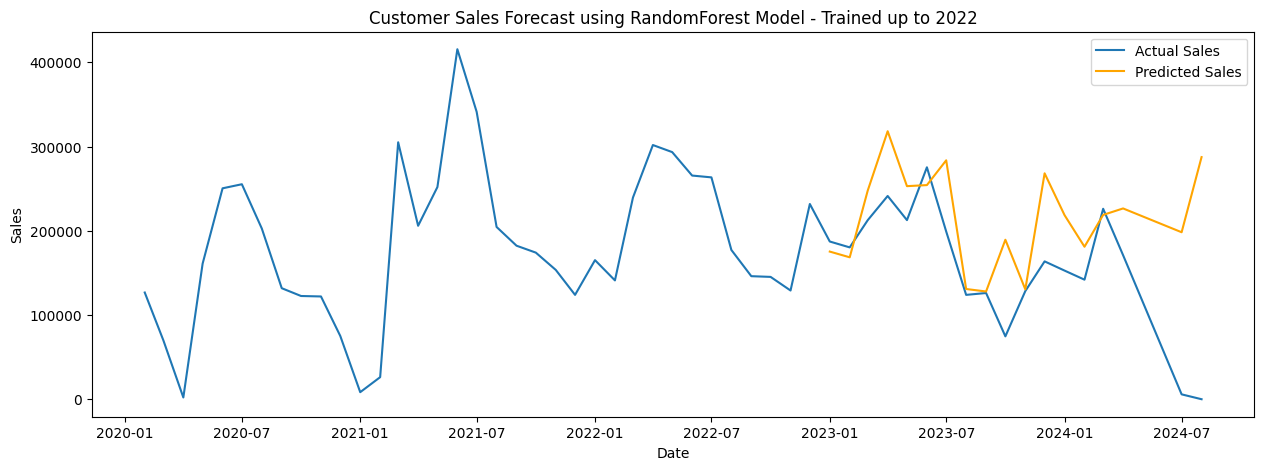

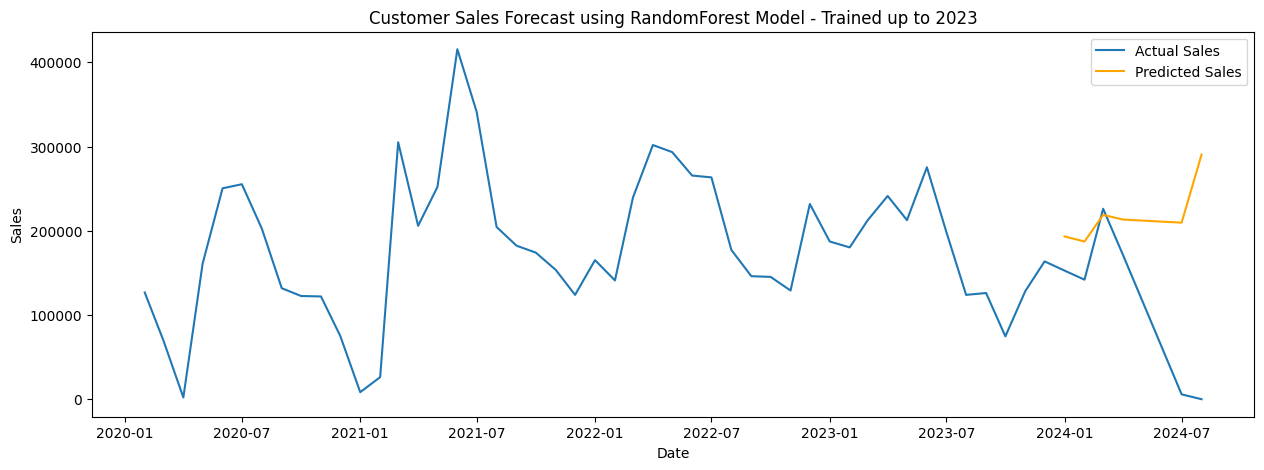

Training Years: 2020 2021
RandomForest MSE: 237242.09231355716
RandomForest MAE: 214967.7874766667
RandomForest R2 Score: -6.280030849250017


Training Years: 2020 2021 2022
RandomForest MSE: 239981.88560704555
RandomForest MAE: 228367.79900555557
RandomForest R2 Score: -17.747813793363907


Training Years: 2020 2021 2022 2023
RandomForest MSE: 258038.4038538125
RandomForest MAE: 246111.1830166667
RandomForest R2 Score: -56.91600288148957




,date,RandomForest Prediction,Actual Sales
0,2022-01-01 00:00:00,100852.749500,8413.900000
1,2022-02-01 00:00:00,33325.782800,26236.130000
2,2022-03-01 00:00:00,322822.037100,305104.420000
3,2022-04-01 00:00:00,281572.421800,205979.160000
4,2022-05-01 00:00:00,270484.295800,251960.320000
5,2022-06-01 00:00:00,440554.099700,415602.740000
6,2022-07-01 00:00:00,328795.188000,341285.960000
7,2022-08-01 00:00:00,167064.879100,204570.230000
8,2022-09-01 00:00:00,158885.531200,182317.480000
9,2022-10-01 00:00:00,180613.999300,174102.810000


In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is already loaded and preprocessed as monthly_sales
# And 'monthly_sales' DataFrame contains 'date', 'sales', and 'sales_diff' columns

# Create the supervised data including the 'date' column
supervised_data = monthly_sales[['date', 'sales_diff']]

# Shift the 'sales_diff' to create lag features
for i in range(1, 13):
    col_name = 'month_' + str(i)
    supervised_data[col_name] = supervised_data['sales_diff'].shift(i)

# Drop any rows with NaN values resulting from the shift
supervised_data = supervised_data.dropna().reset_index(drop=True)

# List of years for progressive training and testing
years = ['2020', '2021', '2022', '2023', '2024']

# Initialize scaler
scaler = MinMaxScaler(feature_range=(-1, 1))

# Initialize model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Store the results
results = []
all_predictions = pd.DataFrame()

for i in range(1, len(years)):
    # Train on data up to the ith year and predict for the remaining years
    train_data = supervised_data[supervised_data['date'].dt.year <= int(years[i - 1])]
    test_data = supervised_data[supervised_data['date'].dt.year > int(years[i - 1])]
    
    # Vérifier si les données d'entraînement ne sont pas vides
    if train_data.empty:
        print(f"Données d'entraînement insuffisantes pour l'année {years[i-1]}.")
        continue
    
    # Reset index
    train_data = train_data.reset_index(drop=True)
    test_data = test_data.reset_index(drop=True)
    
    # Drop the 'date' column before scaling
    train_data_nodate = train_data.drop(['date'], axis=1)
    test_data_nodate = test_data.drop(['date'], axis=1)
    
    # Scale the data
    scaler.fit(train_data_nodate)
    train_data_scaled = scaler.transform(train_data_nodate)
    test_data_scaled = scaler.transform(test_data_nodate)
    
    # Split data into features and target
    x_train, y_train = train_data_scaled[:, 1:], train_data_scaled[:, 0]
    x_test, y_test = test_data_scaled[:, 1:], test_data_scaled[:, 0]
    
    # Train the model
    rf_model.fit(x_train, y_train)
    
    # Make predictions
    rf_pre = rf_model.predict(x_test)
    rf_pre = rf_pre.reshape(-1, 1)
    
    # Inverse transform to get actual values
    rf_pre_test_set = np.concatenate([rf_pre, x_test], axis=1)
    rf_pre_test_set = scaler.inverse_transform(rf_pre_test_set)
    
    # Compute predicted sales
    result_list = []
    act_sales = monthly_sales['sales'][len(train_data):len(train_data) + len(rf_pre_test_set)].tolist()
    for index in range(0, len(rf_pre_test_set)):
        result_list.append(rf_pre_test_set[index][0] + act_sales[index])
    
    rf_predict_series = pd.Series(result_list, name="RandomForest Prediction")
    predict_df = pd.DataFrame(test_data['date'])
    predict_df = predict_df.merge(rf_predict_series, left_index=True, right_index=True)
    
    # Combine actual and predicted sales into a DataFrame for all years
    if years[i] in ['2022', '2023', '2024']:
        predict_df['Actual Sales'] = act_sales
        all_predictions = pd.concat([all_predictions, predict_df])
    
    # Calculate metrics
    rf_mse = np.sqrt(mean_squared_error(predict_df['RandomForest Prediction'], test_data['sales_diff']))
    rf_mae = mean_absolute_error(predict_df['RandomForest Prediction'], test_data['sales_diff'])
    rf_r2 = r2_score(predict_df['RandomForest Prediction'], test_data['sales_diff'])
    
    # Append the results
    results.append({
        'training_years': years[:i],
        'mse': rf_mse,
        'mae': rf_mae,
        'r2': rf_r2
    })
    
    # Plot actual vs predicted sales
    plt.figure(figsize=(15, 5))
    plt.plot(monthly_sales['date'], monthly_sales['sales'], label='Actual Sales')
    plt.plot(predict_df['date'], predict_df['RandomForest Prediction'], label='Predicted Sales', color='orange')
    plt.title(f"Customer Sales Forecast using RandomForest Model - Trained up to {years[i-1]}")
    plt.xlabel("Date")
    plt.ylabel("Sales")
    plt.legend()
    plt.show()

# Print results summary
for result in results:
    print(f"Training Years: {' '.join(result['training_years'])}")
    print(f"RandomForest MSE: {result['mse']}")
    print(f"RandomForest MAE: {result['mae']}")
    print(f"RandomForest R2 Score: {result['r2']}")
    print("\n")
# Reset the index to ensure it's unique
all_predictions = all_predictions.reset_index(drop=True)

# Ensure column names are unique (if necessary)
# If columns are non-unique, rename them or handle them accordingly.
all_predictions.columns = pd.Index(all_predictions.columns).unique()

# Define a function to assign colors based on the difference
def color_sales(predicted, actual):
    diff = abs(predicted - actual)
    if diff > 30000:
        color = 'red'
    elif diff > 20000:
        color = 'orange'
    else:
        color = 'green'
    return f'background-color: {color}'

# Apply the color map to the predictions
styled_predictions = all_predictions.style.apply(
    lambda row: [color_sales(row['RandomForest Prediction'], row['Actual Sales']) if col == 'RandomForest Prediction' else '' for col in all_predictions.columns],
    axis=1
)

# Display the table with colored predictions
styled_predictions




C:\Users\meddh\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\meddh\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\meddh\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\meddh\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\meddh\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\meddh\AppDa

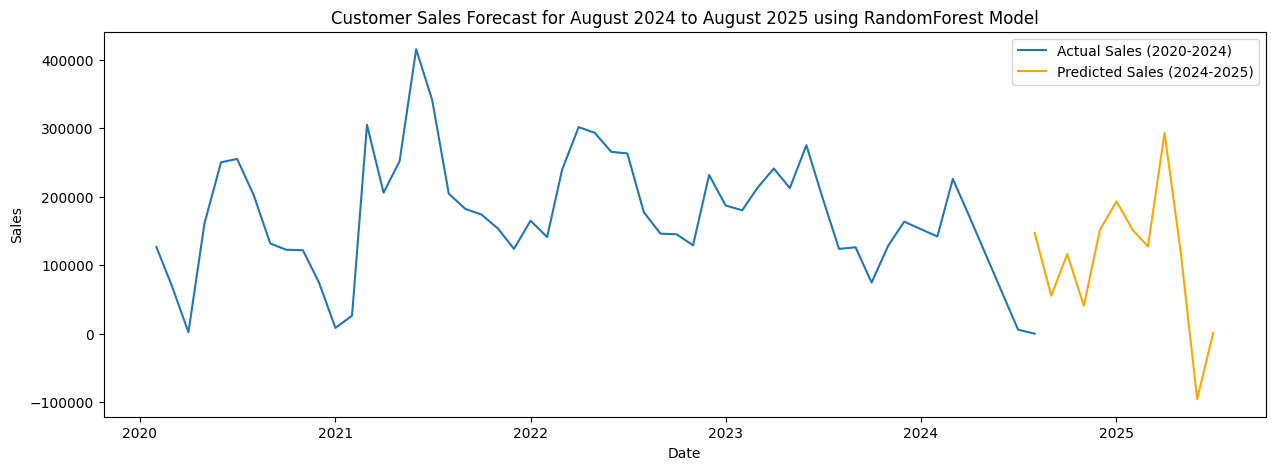

         date  Predicted Sales
0  2024-08-01      147231.6149
1  2024-09-01       55565.9101
2  2024-10-01      116355.2861
3  2024-11-01       40722.7510
4  2024-12-01      151444.3411
5  2025-01-01      193233.8369
6  2025-02-01      150933.0229
7  2025-03-01      127531.6178
8  2025-04-01      293364.1048
9  2025-05-01      121000.0416
10 2025-06-01      -95757.8753
11 2025-07-01        1184.8438


In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is already loaded and preprocessed as 'monthly_sales'
# And 'monthly_sales' DataFrame contains 'date', 'sales', and 'sales_diff' columns

# Create the supervised data including the 'date' column
supervised_data = monthly_sales[['date', 'sales_diff']]

# Shift the 'sales_diff' to create lag features
for i in range(1, 13):
    col_name = 'month_' + str(i)
    supervised_data[col_name] = supervised_data['sales_diff'].shift(i)

# Drop any rows with NaN values resulting from the shift
supervised_data = supervised_data.dropna().reset_index(drop=True)

# Initialize scaler
scaler = MinMaxScaler(feature_range=(-1, 1))

# Initialize RandomForest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train on the entire dataset up to August 2024
train_data = supervised_data[supervised_data['date'].dt.year <= 2024]

# Drop the 'date' column before scaling
train_data_nodate = train_data.drop(['date'], axis=1)

# Scale the data
scaler.fit(train_data_nodate)
train_data_scaled = scaler.transform(train_data_nodate)

# Split the data into features and target
x_train, y_train = train_data_scaled[:, 1:], train_data_scaled[:, 0]

# Train the model on the training set (up to August 2024)
rf_model.fit(x_train, y_train)

# Now prepare the test data for predicting August 2024 to August 2025
# Use the last 12 months from the training data to predict the first month (August 2024)

# Create a placeholder for the predictions
future_predictions = []

# Start with the last known sales_diff values for the prediction
last_known_data = train_data.iloc[-12:].drop(['date'], axis=1).values

# Predict one step at a time for the period from August 2024 to August 2025 (12 months)
for month in range(12):
    # Scale the last known data
    scaled_last_known_data = scaler.transform(last_known_data)
    
    # Use the model to predict the next month
    rf_prediction = rf_model.predict(scaled_last_known_data[:, 1:]).reshape(-1, 1)
    
    # Inverse scale the prediction
    rf_pre_test_set = np.concatenate([rf_prediction, scaled_last_known_data[:, 1:]], axis=1)
    rf_pre_test_set = scaler.inverse_transform(rf_pre_test_set)
    
    # Add the predicted sales_diff to the last known actual sales to get the sales prediction
    predicted_sales = rf_pre_test_set[0][0] + monthly_sales['sales'].iloc[-12 + month]
    future_predictions.append(predicted_sales)
    
    # Update the last_known_data to include the new prediction for the next step
    new_row = np.concatenate(([rf_pre_test_set[0][0]], last_known_data[0][:-1]))
    last_known_data = np.vstack([last_known_data[1:], new_row])

# Create a DataFrame for August 2024 to August 2025 predictions
dates_2024_2025 = pd.date_range(start='2024-08-01', periods=12, freq='MS')
predictions_2024_2025 = pd.DataFrame({'date': dates_2024_2025, 'Predicted Sales': future_predictions})

# Plot actual vs predicted sales
plt.figure(figsize=(15, 5))
plt.plot(monthly_sales['date'], monthly_sales['sales'], label='Actual Sales (2020-2024)')
plt.plot(predictions_2024_2025['date'], predictions_2024_2025['Predicted Sales'], label='Predicted Sales (2024-2025)', color='orange')
plt.title("Customer Sales Forecast for August 2024 to August 2025 using RandomForest Model")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

# Display the predictions from August 2024 to August 2025
print(predictions_2024_2025)


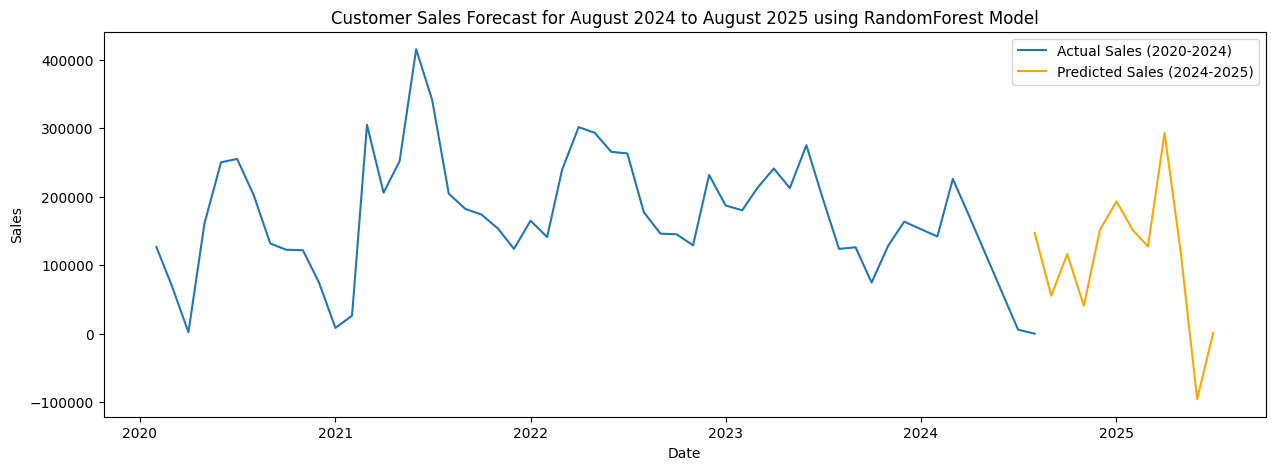

         date  Predicted Sales
0  2024-08-01      147231.6149
1  2024-09-01       55565.9101
2  2024-10-01      116355.2861
3  2024-11-01       40722.7510
4  2024-12-01      151444.3411
5  2025-01-01      193233.8369
6  2025-02-01      150933.0229
7  2025-03-01      127531.6178
8  2025-04-01      293364.1048
9  2025-05-01      121000.0416
10 2025-06-01      -95757.8753
11 2025-07-01        1184.8438


In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is already loaded and preprocessed as 'monthly_sales'
# And 'monthly_sales' DataFrame contains 'date', 'sales', and 'sales_diff' columns

# Create the supervised data including the 'date' column
supervised_data = monthly_sales[['date', 'sales_diff']]

# Shift the 'sales_diff' to create lag features
for i in range(1, 13):
    col_name = 'month_' + str(i)
    supervised_data[col_name] = supervised_data['sales_diff'].shift(i)

# Drop any rows with NaN values resulting from the shift
supervised_data = supervised_data.dropna().reset_index(drop=True)

# Initialize scaler
scaler = MinMaxScaler(feature_range=(-1, 1))

# Initialize RandomForest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train on the entire dataset up to August 2024
train_data = supervised_data[supervised_data['date'].dt.year <= 2024]

# Drop the 'date' column before scaling
train_data_nodate = train_data.drop(['date'], axis=1)

# Scale the data
scaler.fit(train_data_nodate)
train_data_scaled = scaler.transform(train_data_nodate)

# Split the data into features and target
x_train, y_train = train_data_scaled[:, 1:], train_data_scaled[:, 0]

# Train the model on the training set (up to August 2024)
rf_model.fit(x_train, y_train)

# Now prepare the test data for predicting August 2024 to August 2025
# Use the last 12 months from the training data to predict the first month (August 2024)

# Create a placeholder for the predictions
future_predictions = []

# Start with the last known sales_diff values for the prediction
last_known_data = train_data.iloc[-12:].drop(['date'], axis=1)

# Ensure that `last_known_data` is a DataFrame with the same column names
last_known_data.columns = train_data_nodate.columns  # Ensure column consistency

# Predict one step at a time for the period from August 2024 to August 2025 (12 months)
for month in range(12):
    # Scale the last known data
    scaled_last_known_data = scaler.transform(last_known_data)
    
    # Use the model to predict the next month
    rf_prediction = rf_model.predict(scaled_last_known_data[:, 1:]).reshape(-1, 1)
    
    # Inverse scale the prediction
    rf_pre_test_set = np.concatenate([rf_prediction, scaled_last_known_data[:, 1:]], axis=1)
    rf_pre_test_set = scaler.inverse_transform(rf_pre_test_set)
    
    # Add the predicted sales_diff to the last known actual sales to get the sales prediction
    predicted_sales = rf_pre_test_set[0][0] + monthly_sales['sales'].iloc[-12 + month]
    future_predictions.append(predicted_sales)
    
    # Update the last_known_data to include the new prediction for the next step
    new_row = np.concatenate(([rf_pre_test_set[0][0]], last_known_data.iloc[0, :-1].values))  # Consistency here
    new_row = pd.DataFrame([new_row], columns=last_known_data.columns)  # Maintain DataFrame structure
    
    # Shift the window by dropping the first row and adding the new one
    last_known_data = pd.concat([last_known_data.iloc[1:], new_row], ignore_index=True)


# Create a DataFrame for August 2024 to August 2025 predictions
dates_2024_2025 = pd.date_range(start='2024-08-01', periods=12, freq='MS')
predictions_2024_2025 = pd.DataFrame({'date': dates_2024_2025, 'Predicted Sales': future_predictions})

# Plot actual vs predicted sales
plt.figure(figsize=(15, 5))
plt.plot(monthly_sales['date'], monthly_sales['sales'], label='Actual Sales (2020-2024)')
plt.plot(predictions_2024_2025['date'], predictions_2024_2025['Predicted Sales'], label='Predicted Sales (2024-2025)', color='orange')
plt.title("Customer Sales Forecast for August 2024 to August 2025 using RandomForest Model")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

# Display the predictions from August 2024 to August 2025
print(predictions_2024_2025)


C:\Users\meddh\anaconda3\envs\new_env\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 550ms/step - loss: 0.2075 - val_loss: 0.2031
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.2123 - val_loss: 0.1956
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 0.1920 - val_loss: 0.1887
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 0.1797 - val_loss: 0.1824
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.1850 - val_loss: 0.1761
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.1882 - val_loss: 0.1700
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.1684 - val_loss: 0.1638
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.1627 - val_loss: 0.1577
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.1456 - val_loss: 0.1516
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.1467 - val_loss: 0.1453
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.1328 - val_loss: 0.1389
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.1241 - val_loss: 0.13

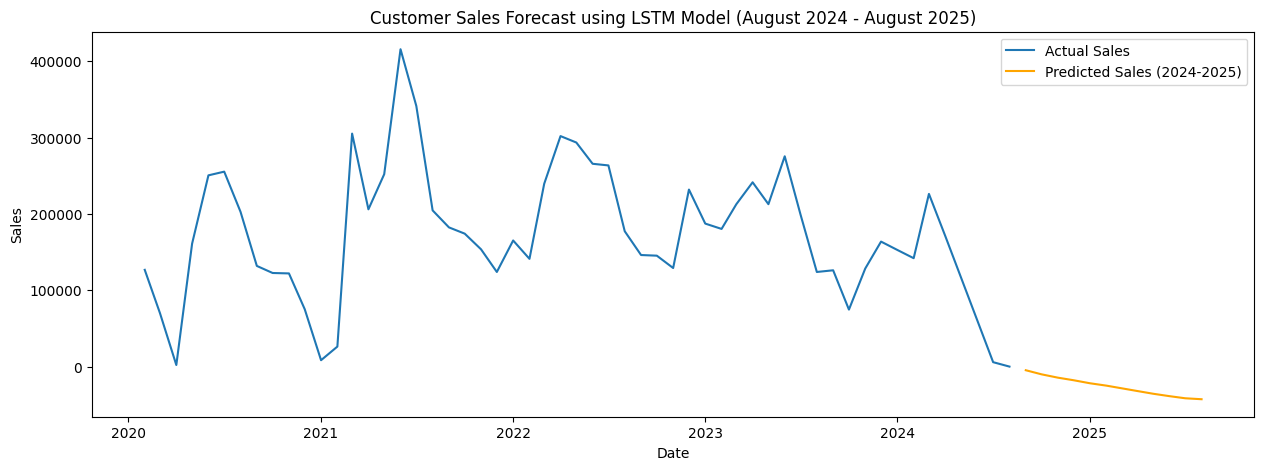

In [39]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Assuming `monthly_sales` DataFrame contains 'date' and 'sales' columns

# Create supervised data
supervised_data = monthly_sales[['date', 'sales']].copy()

# Create the 'sales_diff' feature (difference between sales and previous month)
supervised_data['sales_diff'] = supervised_data['sales'].diff()
supervised_data = supervised_data.dropna()

# Select features and target
features = supervised_data['sales_diff'].values.reshape(-1, 1)

# Scale the features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_features = scaler.fit_transform(features)

# Create sequences of 12 months (look-back period)
def create_sequences(data, time_steps=12):
    sequences = []
    labels = []
    for i in range(time_steps, len(data)):
        sequences.append(data[i-time_steps:i])
        labels.append(data[i])
    return np.array(sequences), np.array(labels)

# Prepare sequences for LSTM
X, y = create_sequences(scaled_features)

# Reshape data for LSTM (samples, time steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split into training and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))  # Output layer to predict sales_diff
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

# Predict future sales (August 2024 to August 2025)
predictions = []
last_sequence = X[-1]

for _ in range(12):  # Predict the next 12 months
    next_pred = model.predict(last_sequence.reshape(1, 12, 1))
    predictions.append(next_pred[0, 0])
    
    # Update the sequence by removing the first value and adding the predicted value
    last_sequence = np.append(last_sequence[1:], next_pred, axis=0)

# Inverse transform the predictions to get the original scale
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Generate future dates for the predictions
future_dates = pd.date_range(start='2024-09-01', periods=12, freq='MS')

# Create a DataFrame with the predictions
predicted_sales_df = pd.DataFrame({'date': future_dates, 'predicted_sales_diff': predictions.flatten()})

# Calculate the predicted sales by adding the cumulative sales_diff to the last known sales
last_known_sales = monthly_sales['sales'].iloc[-1]
predicted_sales_df['predicted_sales'] = predicted_sales_df['predicted_sales_diff'].cumsum() + last_known_sales

# Plot the results
plt.figure(figsize=(15, 5))
plt.plot(monthly_sales['date'], monthly_sales['sales'], label='Actual Sales')
plt.plot(predicted_sales_df['date'], predicted_sales_df['predicted_sales'], label='Predicted Sales (2024-2025)', color='orange')
plt.title('Customer Sales Forecast using LSTM Model (August 2024 - August 2025)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()



In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming `monthly_sales` DataFrame contains 'date' and 'sales' columns
# Convert 'date' column to datetime and set it as index
monthly_sales['date'] = pd.to_datetime(monthly_sales['date'])
monthly_sales.set_index('date', inplace=True)

# Ensure the index is sorted in case it's not
monthly_sales = monthly_sales.sort_index()

# Check the start and end of the available data
print("Data Range:", monthly_sales.index.min(), "to", monthly_sales.index.max())

# Define SARIMA parameters (modify based on your data)
p, d, q = 1, 1, 1  # ARIMA orders
P, D, Q, S = 1, 1, 1, 12  # Seasonal orders

# Fit SARIMA model
sarima_model = SARIMAX(monthly_sales['sales'], order=(p, d, q),
                       seasonal_order=(P, D, Q, S),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
sarima_result = sarima_model.fit()

# Print summary of the model
print(sarima_result.summary())

# Forecast sales from August 2024 to August 2025
# Adjust start and end dates based on your dataset
start_date = '2024-08-01'
end_date = '2025-08-01'

# Ensure the start and end dates are beyond the current data range
forecast = sarima_result.predict(start=pd.to_datetime(start_date), end=pd.to_datetime(end_date))

# Create a DataFrame for forecasted sales
forecast_df = pd.DataFrame({'date': pd.date_range(start=start_date, periods=len(forecast), freq='MS'), 'predicted_sales': forecast.values})

# Plot actual vs predicted sales
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['sales'], label='Actual Sales')
plt.plot(forecast_df['date'], forecast_df['predicted_sales'], label='Predicted Sales (2024-2025)', color='orange')
plt.title('Sales Forecast (SARIMA) from August 2024 to August 2025')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


Columns: Index(['sales', 'sales_diff'], dtype='object')


KeyError: 'date'

Skipping year 2020 due to insufficient training data.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 604ms/step


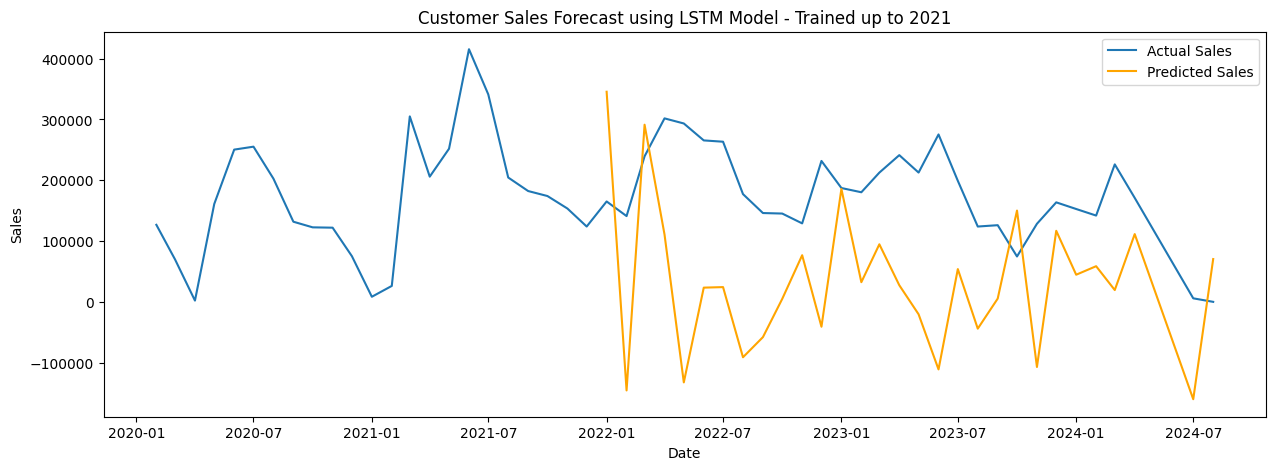

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


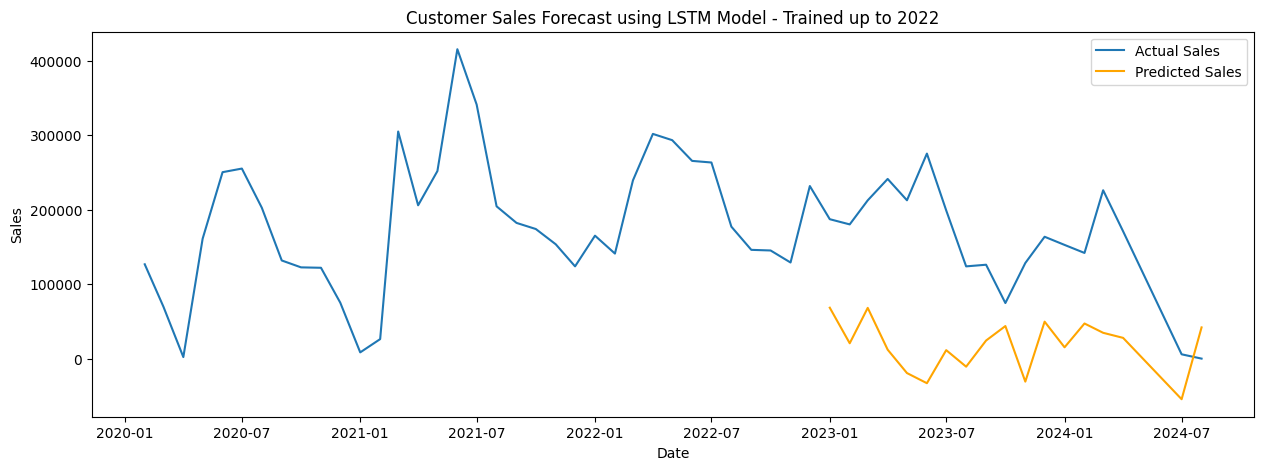

Training Years: 2020 2021
LSTM MSE: 118528.17460277306
LSTM MAE: 90179.66582125536
LSTM R2 Score: -0.03805739125228924


Training Years: 2020 2021 2022
LSTM MSE: 67094.68859782073
LSTM MAE: 57879.01712163076
LSTM R2 Score: -2.834105685586142




In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional, Input
from keras.callbacks import EarlyStopping
from keras.regularizers import l2

# Assuming your data is already loaded and preprocessed as monthly_sales
# And 'monthly_sales' DataFrame contains 'date', 'sales', and 'sales_diff' columns

# Create the supervised data including the 'date' column
supervised_data = monthly_sales[['date', 'sales_diff']]

# Shift the 'sales_diff' to create lag features
for i in range(1, 13):
    col_name = 'month_' + str(i)
    supervised_data[col_name] = supervised_data['sales_diff'].shift(i)

# Drop any rows with NaN values resulting from the shift
supervised_data = supervised_data.dropna().reset_index(drop=True)

# List of years for progressive training and testing
years = ['2020', '2021', '2022', '2023']

# Initialize scaler
scaler = MinMaxScaler(feature_range=(-1, 1))

# Store the results
results = []

for i in range(1, len(years)):
    # Train on data up to the ith year and predict for the remaining years
    train_data = supervised_data[supervised_data['date'].dt.year <= int(years[i - 1])]
    test_data = supervised_data[supervised_data['date'].dt.year > int(years[i - 1])]
    
    # If no test data is available, continue to the next iteration
    if test_data.empty:
        print(f"Skipping prediction for {years[i]} and beyond as there's no data.")
        continue
    
    # Reset index
    train_data = train_data.reset_index(drop=True)
    test_data = test_data.reset_index(drop=True)
    
    # Drop the 'date' column before scaling
    train_data_nodate = train_data.drop(['date'], axis=1)
    test_data_nodate = test_data.drop(['date'], axis=1)
    
    # Check if training data is empty after dropping the date
    if train_data_nodate.empty:
        print(f"Skipping year {years[i - 1]} due to insufficient training data.")
        continue
    
    # Scale the data
    scaler.fit(train_data_nodate)
    train_data_scaled = scaler.transform(train_data_nodate)
    test_data_scaled = scaler.transform(test_data_nodate)
    
    # Split data into features and target
    x_train = train_data_scaled[:, 1:].reshape(train_data_scaled.shape[0], 1, train_data_scaled.shape[1] - 1)
    y_train = train_data_scaled[:, 0]
    x_test = test_data_scaled[:, 1:].reshape(test_data_scaled.shape[0], 1, test_data_scaled.shape[1] - 1)
    y_test = test_data_scaled[:, 0]
    
    # Define the LSTM model with improvements
    model = Sequential()
    model.add(Input(shape=(1, x_train.shape[2])))
    model.add(Bidirectional(LSTM(units=100, return_sequences=True, kernel_regularizer=l2(0.01))))
    model.add(Dropout(0.3))
    model.add(Bidirectional(LSTM(units=50, return_sequences=False, kernel_regularizer=l2(0.01))))
    model.add(Dropout(0.3))
    model.add(Dense(1))
    
    # Compile the model with a lower learning rate
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Implement early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    
    # Train the model
    model.fit(x_train, y_train, epochs=200, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=0)
    
    # Make predictions
    predictions = model.predict(x_test)
    
    # Inverse transform to get actual values
    x_test_reshaped = x_test.reshape(x_test.shape[0], x_test.shape[2])
    predictions = np.concatenate([predictions, x_test_reshaped], axis=1)
    predictions = scaler.inverse_transform(predictions)
    predictions = predictions[:, 0]
    
    # Calculate metrics
    mse = np.sqrt(mean_squared_error(predictions, test_data['sales_diff']))
    mae = mean_absolute_error(predictions, test_data['sales_diff'])
    r2 = r2_score(predictions, test_data['sales_diff'])
    
    # Append the results
    results.append({
        'training_years': years[:i],
        'mse': mse,
        'mae': mae,
        'r2': r2
    })
    
    # Plot actual vs predicted sales
    plt.figure(figsize=(15, 5))
    plt.plot(monthly_sales['date'], monthly_sales['sales'], label='Actual Sales')
    plt.plot(test_data['date'], predictions, label='Predicted Sales', color='orange')
    plt.title(f"Customer Sales Forecast using LSTM Model - Trained up to {years[i-1]}")
    plt.xlabel("Date")
    plt.ylabel("Sales")
    plt.legend()
    plt.show()

# Print results summary
for result in results:
    print(f"Training Years: {' '.join(result['training_years'])}")
    print(f"LSTM MSE: {result['mse']}")
    print(f"LSTM MAE: {result['mae']}")
    print(f"LSTM R2 Score: {result['r2']}")
    print("\n")


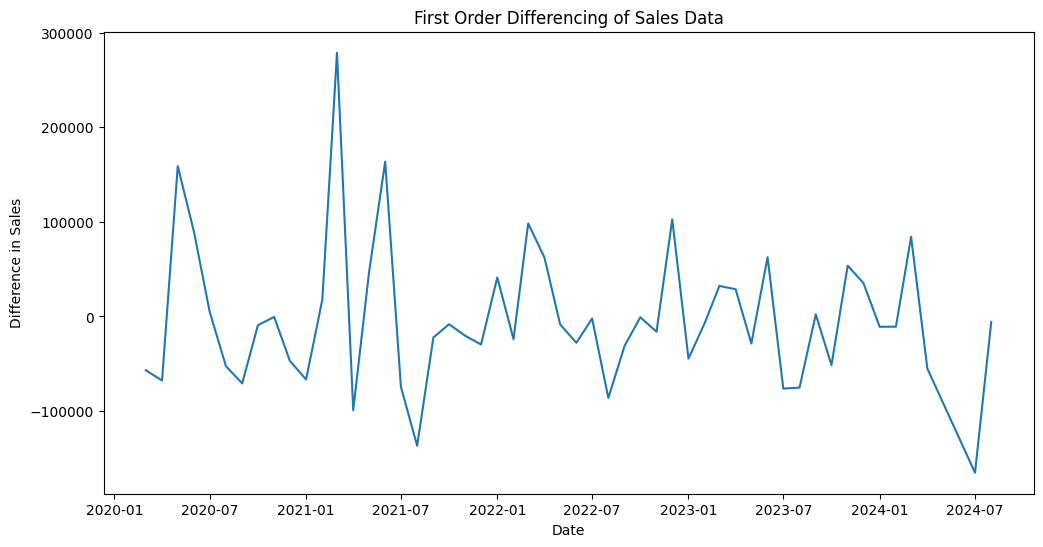

In [27]:
# First differencing
monthly_sales['sales_diff'] = monthly_sales['sales'].diff()

# Dropping the first NaN value resulting from the difference
monthly_sales = monthly_sales.dropna()

# Plot the first difference
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['date'], monthly_sales['sales_diff'])
plt.title("First Order Differencing of Sales Data")
plt.xlabel("Date")
plt.ylabel("Difference in Sales")
plt.show()


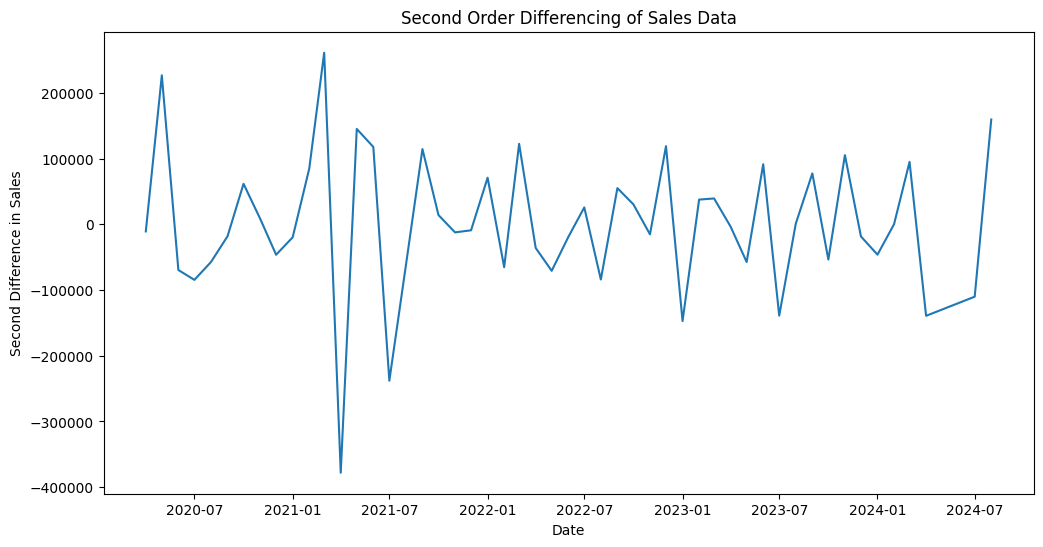

In [28]:
# Second differencing
monthly_sales['sales_diff2'] = monthly_sales['sales_diff'].diff()

# Dropping the NaN values resulting from the second difference
monthly_sales = monthly_sales.dropna()

# Plot the second difference
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['date'], monthly_sales['sales_diff2'])
plt.title("Second Order Differencing of Sales Data")
plt.xlabel("Date")
plt.ylabel("Second Difference in Sales")
plt.show()

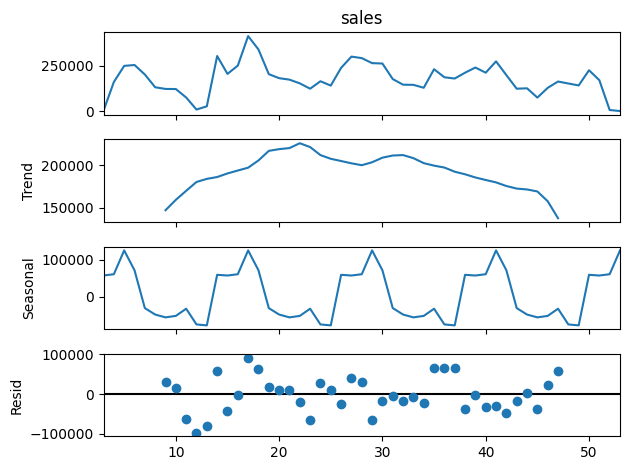

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the sales data into trend, seasonal, and residual components
decomposition = seasonal_decompose(monthly_sales['sales'], model='additive', period=12)

# Plot the decomposed components
decomposition.plot()
plt.show()

- The Augmented Dickey-Fuller (ADF) test results you've provided indicate whether the time series data is stationary.

- The ADF statistic is significantly negative (-6.163), which is a strong indicator that the series is stationary.

- The p-value is extremely small (7.09e-08), which is well below the common significance level of 0.05. This means you can reject the null hypothesis that the data has a unit root and conclude that the second differenced data is indeed stationary.


In [30]:
from statsmodels.tsa.stattools import adfuller

# ADF Test on the second differenced data
result = adfuller(monthly_sales['sales_diff2'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -6.163075135347917
p-value: 7.096461393263125e-08


In [34]:
import pandas as pd

# Liste des jours fériés en Tunisie pour les années 2020 à 2024
holidays = {
    2020: [
        '2020-01-01', '2020-03-20', '2020-04-09', '2020-05-01', '2020-05-24', '2020-05-25',
        '2020-07-31', '2020-08-13', '2020-07-25'
    ],
    2021: [
        '2021-01-01', '2021-03-20', '2021-04-09', '2021-05-01', '2021-05-13', '2021-05-14',
        '2021-07-20', '2021-07-21', '2021-07-25', '2021-08-13'
    ],
    2022: [
        '2022-01-01', '2022-03-20', '2022-04-09', '2022-05-01', '2022-05-02', '2022-05-03',
        '2022-07-09', '2022-07-10', '2022-07-25', '2022-08-13'
    ],
    2023: [
        '2023-01-01', '2023-03-20', '2023-04-09', '2023-05-01', '2023-04-21', '2023-04-22',
        '2023-06-28', '2023-06-29', '2023-07-25', '2023-08-13'
    ],
    2024: [
        '2024-01-01', '2024-03-20', '2024-04-09', '2024-05-01', '2024-05-11', '2024-05-12',
        '2024-06-20', '2024-07-25'
    ]
}

# Convertir les jours fériés en datetime et les combiner en une seule liste
all_holidays = pd.to_datetime(sum(holidays.values(), []))

# Charger le fichier Excel
file_path = 'SalesData.xlsx'
df = pd.read_excel(file_path)

# Convertir la colonne 'date' en datetime
df['date'] = pd.to_datetime(df['date'])

# Ajouter une colonne 'holidays' qui indique le jour férié ou None
df['holidays'] = df['date'].apply(lambda x: x if x in all_holidays else pd.NaT)

# Enregistrer le fichier Excel avec la nouvelle colonne
df.to_excel('SalesData_with_Holidays.xlsx', index=False)

print("Le fichier avec la colonne 'holidays' a été enregistré avec succès sous le nom 'SalesData_with_Holidays.xlsx'.")


Le fichier avec la colonne 'holidays' a été enregistré avec succès sous le nom 'SalesData_with_Holidays.xlsx'.


Automated Reordering

In [2]:
import pandas as pd

# Charger les données depuis le fichier CSV
csv_file = "Baba.csv"  # Nom du fichier CSV
df = pd.read_csv(csv_file, sep=',')

# Enregistrer les données dans un fichier Excel
excel_file = "Baba.xlsx"  # Nom du fichier Excel de sortie
df.to_excel(excel_file, index=False)

print(f"Les données ont été transformées et enregistrées dans {excel_file}")


Les données ont été transformées et enregistrées dans Baba.xlsx


In [5]:
import pandas as pd
import numpy as np

# Load the data
excel_file = "Baba.xlsx"
financial_data = pd.read_excel(excel_file)

# Define constants
lead_time_days = 5  # Fixed lead time (adjust as per your data frequency)
rolling_window_size = 7  # Window size for rolling calculations
service_level = 0.95  # Desired service level (95%)
z_score = 1.645  # Z-score for 95% service level

# Step 1: Calculate daily sales (ensure it's adjusted for your data frequency)
financial_data['daily_sales'] = financial_data['Volume'] / lead_time_days

# Step 2: Calculate Safety Stock using rolling standard deviation of daily sales
financial_data['sales_std_dev'] = financial_data['Volume'].rolling(window=rolling_window_size).std().fillna(0)

# Safety Stock = Z-score * std_dev * sqrt(lead time)
# You can reduce the safety stock if it's too high
financial_data['safety_stock'] = z_score * financial_data['sales_std_dev'] * np.sqrt(lead_time_days)

# Step 3: Calculate reorder point
financial_data['reorder_point'] = (financial_data['daily_sales'] * lead_time_days) + financial_data['safety_stock']

# Step 4: Determine if reorder is needed
financial_data['needs_reorder'] = financial_data['Volume'] <= financial_data['reorder_point']

# Display results
print(financial_data[['Date', 'Volume', 'reorder_point', 'needs_reorder']])

# Step 5: Filter days requiring reorder
days_to_reorder = financial_data[financial_data['needs_reorder']]
print("Jours nécessitant un réapprovisionnement :")
print(days_to_reorder[['Date', 'Volume', 'reorder_point']])

# Optional: Check the distribution of reorder points to see if they're reasonable
print(financial_data['reorder_point'].describe())


            Date     Volume  reorder_point  needs_reorder
0     2014-09-19  271879400   2.718794e+08           True
1     2014-09-22   66657800   6.665780e+07           True
2     2014-09-23   39009800   3.900980e+07           True
3     2014-09-24   32088000   3.208800e+07           True
4     2014-09-25   28598000   2.859800e+07           True
...          ...        ...            ...            ...
1887  2022-03-18   83715800   2.336989e+08           True
1888  2022-03-21   58882900   1.979916e+08           True
1889  2022-03-22   88193400   2.082221e+08           True
1890  2022-03-23   81605700   1.983894e+08           True
1891  2022-03-24   55812000   1.827859e+08           True

[1892 rows x 4 columns]
Jours nécessitant un réapprovisionnement :
            Date     Volume  reorder_point
0     2014-09-19  271879400   2.718794e+08
1     2014-09-22   66657800   6.665780e+07
2     2014-09-23   39009800   3.900980e+07
3     2014-09-24   32088000   3.208800e+07
4     2014-09-25   28

-lead_time_days : Un délai de livraison hypothétique utilisé pour calculer le point de réapprovisionnement.
-daily_sales : Estimation des ventes quotidiennes basée sur le volume moyen pendant le délai de livraison.
-safety_stock : Stock de sécurité calculé pour chaque jour.
-reorder_point : Point de réapprovisionnement basé sur les ventes quotidiennes et le stock de sécurité.
-needs_reorder : Colonne booléenne indiquant si le volume d'un jour donné est inférieur ou égal au point de réapprovisionnement.
(Le point de réapprovisionnement, en anglais "reorder point", est un concept clé en gestion des stocks. Il représente le niveau de stock 
à partir duquel une nouvelle commande doit être passée pour éviter une rupture de stock.)

count    1.892000e+03
mean     1.843771e+07
std      1.317609e+07
min      3.775300e+06
25%      1.148042e+07
50%      1.546250e+07
75%      2.099822e+07
max      2.718794e+08
Name: Volume, dtype: float64
         Date     Volume
0  2014-09-19  271879400
1  2014-09-22   66657800
2  2014-09-23   39009800
3  2014-09-24   32088000
4  2014-09-25   28598000
5  2014-09-26   18340000
6  2014-09-29   25302000
7  2014-09-30   24419400
8  2014-10-01   24029600
9  2014-10-02   21469700


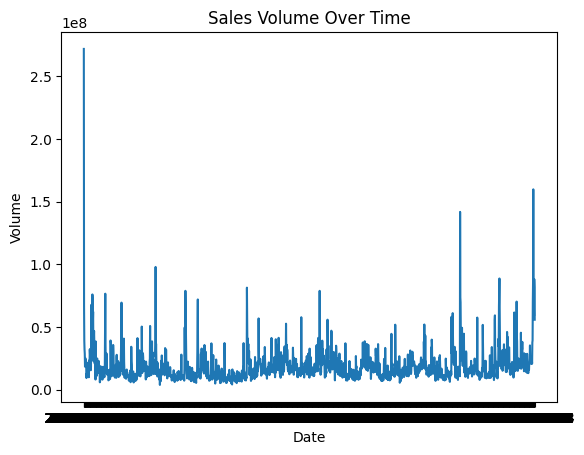

In [6]:
# Check basic statistics of the Volume column
print(financial_data['Volume'].describe())

# Check the first few rows to inspect the data visually
print(financial_data[['Date', 'Volume']].head(10))

# Plot Volume over time to check its pattern
import matplotlib.pyplot as plt

plt.plot(financial_data['Date'], financial_data['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Sales Volume Over Time')
plt.show()


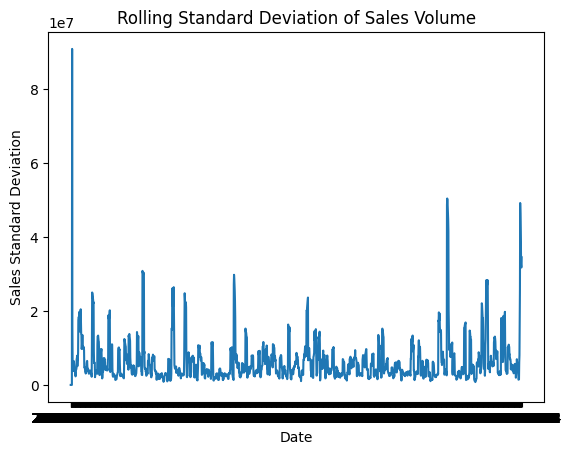

In [7]:
# Plot the rolling standard deviation of Volume over time
financial_data['sales_std_dev'] = financial_data['Volume'].rolling(window=7).std().fillna(0)

plt.plot(financial_data['Date'], financial_data['sales_std_dev'])
plt.xlabel('Date')
plt.ylabel('Sales Standard Deviation')
plt.title('Rolling Standard Deviation of Sales Volume')
plt.show()


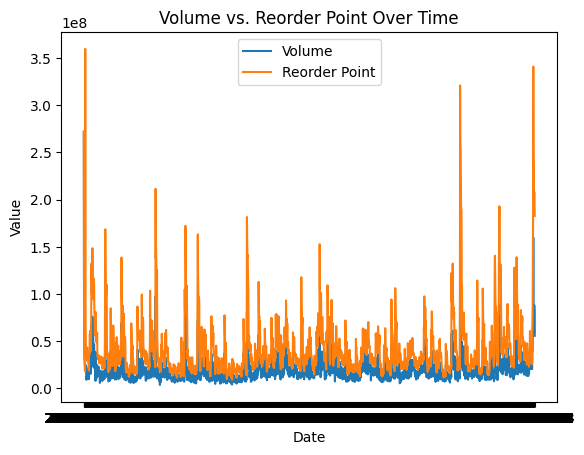

In [8]:
# Plot reorder points and Volume to compare
plt.plot(financial_data['Date'], financial_data['Volume'], label='Volume')
plt.plot(financial_data['Date'], financial_data['reorder_point'], label='Reorder Point')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Volume vs. Reorder Point Over Time')
plt.legend()
plt.show()


In [9]:
# Detect outliers using basic quantile checks
q1 = financial_data['Volume'].quantile(0.25)
q3 = financial_data['Volume'].quantile(0.75)
iqr = q3 - q1  # Interquartile range

# Define bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Check for outliers
outliers = financial_data[(financial_data['Volume'] < lower_bound) | (financial_data['Volume'] > upper_bound)]
print("Outliers in Volume data:")
print(outliers[['Date', 'Volume']])


Outliers in Volume data:
            Date     Volume
0     2014-09-19  271879400
1     2014-09-22   66657800
2     2014-09-23   39009800
31    2014-11-03   40883700
32    2014-11-04   67814000
...          ...        ...
1887  2022-03-18   83715800
1888  2022-03-21   58882900
1889  2022-03-22   88193400
1890  2022-03-23   81605700
1891  2022-03-24   55812000

[118 rows x 2 columns]


            Date     Volume  reorder_point  needs_reorder
0     2014-09-19  271879400   1.941996e+08          False
1     2014-09-22   66657800   4.761271e+07          False
2     2014-09-23   39009800   2.786414e+07          False
3     2014-09-24   32088000   2.292000e+07          False
4     2014-09-25   28598000   2.042714e+07          False
...          ...        ...            ...            ...
1887  2022-03-18   83715800   1.765012e+08           True
1888  2022-03-21   58882900   1.503018e+08           True
1889  2022-03-22   88193400   1.563914e+08           True
1890  2022-03-23   81605700   1.491610e+08           True
1891  2022-03-24   55812000   1.386661e+08           True

[1892 rows x 4 columns]
Jours nécessitant un réapprovisionnement :
            Date    Volume  reorder_point
6     2014-09-29  25302000   2.781354e+08
7     2014-09-30  24419400   6.322681e+07
8     2014-10-01  24029600   3.618283e+07
9     2014-10-02  21469700   2.820427e+07
10    2014-10-03  18485700

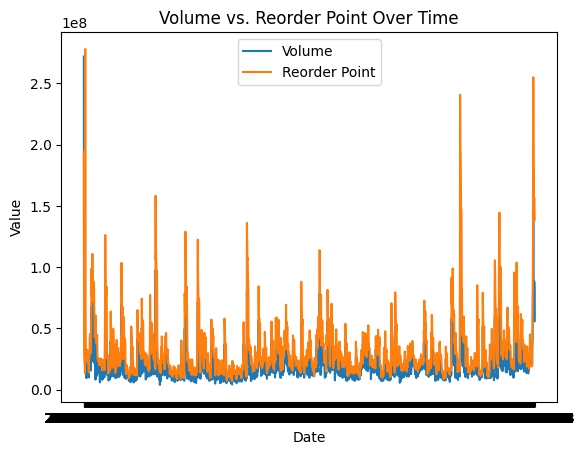

count    1.892000e+03
mean     3.171237e+07
std      2.410759e+07
min      6.978761e+06
25%      1.802087e+07
50%      2.467642e+07
75%      3.654498e+07
max      2.781354e+08
Name: reorder_point, dtype: float64


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
excel_file = "Baba.xlsx"
financial_data = pd.read_excel(excel_file)

# Define constants
lead_time_days = 5  # Fixed lead time (adjust if needed)
rolling_window_size = 7  # Window size for rolling calculations
z_score = 1.28  # Adjusted Z-score for 90% service level (lowered to reduce safety stock)

# Step 1: Recalculate daily sales (ensure it matches data frequency)
# Adjust for weekly or monthly data as needed. If weekly, divide by 7. Adjust divisor based on your data.
financial_data['daily_sales'] = financial_data['Volume'] / 7  # Adjust divisor based on your actual data frequency

# Step 2: Calculate safety stock using rolling standard deviation of Volume
financial_data['sales_std_dev'] = financial_data['Volume'].rolling(window=rolling_window_size).std().fillna(0)

# Safety Stock = Z-score * std_dev * sqrt(lead time)
financial_data['safety_stock'] = z_score * financial_data['sales_std_dev'] * np.sqrt(lead_time_days)

# Step 3: Calculate the reorder point
financial_data['reorder_point'] = (financial_data['daily_sales'] * lead_time_days) + financial_data['safety_stock']

# Step 4: Determine if reorder is needed
financial_data['needs_reorder'] = financial_data['Volume'] <= financial_data['reorder_point']

# Display results
print(financial_data[['Date', 'Volume', 'reorder_point', 'needs_reorder']])

# Step 5: Filter days requiring reorder
days_to_reorder = financial_data[financial_data['needs_reorder']]
print("Jours nécessitant un réapprovisionnement :")
print(days_to_reorder[['Date', 'Volume', 'reorder_point']])

# Plot to visualize
plt.plot(financial_data['Date'], financial_data['Volume'], label='Volume')
plt.plot(financial_data['Date'], financial_data['reorder_point'], label='Reorder Point')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Volume vs. Reorder Point Over Time')
plt.legend()
plt.show()

# Optional: Check the distribution of reorder points to ensure they're reasonable
print(financial_data['reorder_point'].describe())
